# Marketing Campaign: Augmenter les bénéfices d’une campagne de marketing

# Part 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
import scipy.stats as st
import collections
from statsmodels.formula.api import ols

from scipy import stats
from sklearn import preprocessing
from sklearn import decomposition

Mise en forme du Notebook

In [2]:
#Format des nombres:
pd.set_option('display.float_format', '{:.2f}'.format)

#Montrer toutes les colonnes:
pd.options.display.max_columns = None

## Table des matières

* [0 Téléchargement, nettoyage et mis en forme du dataframe](#chapter0)
    * [0.1 Télécharger le jeu de données: Marketing Campaign ](#section_0_1)
    * [0.2 Nettoyage et mis en forme du dataframe](#section_0_2)
        * [0.2.1 Mise en forme des variables](#section_0_2_1)
        * [0.2.2 Contrôle de valeurs nuls et doublons](#section_0_2_2)
        * [0.2.3 Contrôle de valeurs atypiques et aberrantes](#section_0_2_3)

* [1 EDA - (Analyse univarié et bivarié)](#chapter1)
    * [1.1 Analyse univarié des variables](#section_1_1)
    * [1.2 Analyse bivarié des variables](#section_1_2)
    * [1.3 Explication des unités utilisées](#section_1_3)
    
* [ANNEXE](#chapterA)
    * [A.1 Imputation de la variable "Income" via une régression linéaire](#section_A_1)

## 0 Téléchargement, nettoyage et mis en forme du dataframe <a class="anchor" id="chapter0"></a>

- 0.1 Télécharger le jeu de données: Marketing Campaign
- 0.2 Nettoyage et mis en forme

### 0.1 Télécharger le jeu de données: Marketing Campaign <a class="anchor" id="section_0_1"></a>

#### Source:

Le dataset vient du site Kaggle. Vous pouvez le retrouver dans le lien qui se trouve ci-dessous:

https://www.kaggle.com/rodsaldanha/arketing-campaign?select=marketing_campaign.csv

#### Licence: 

CC0: Public Domain

#### Contexte

Cet ensemble de données appelé Marketing Campaign: Boost the profit of a marketing campaign (augmenter les bénéfices d’une campagne de marketing) provient d’un adaptation du CRM de l’entreprise Ifood, lequel a été fourni aux étudiants pour leurs projets finaux dans un cours appelé Advanced Data Analytics dans le cadre du programme de Master of Science Business Analytics à Hult International Business School pour l’AY 20/21.

#### Content

Il se compose de 2,240 clients de la société XYZ avec des données sur :

**Succès/échecs de la campagne**

- AcceptedCmp1/2/3/4/5 : 1 si le client a accepté l’offre dans le cadre de cette campagne, 0 autrement
- Response (target) :1 si le client a accepté l’offre dans la dernière campagne, 0 autrement

**Profils client**

- Complain :1 si le client s’est plaint au cours des 2 dernières années
- Days_Engaged : Jours d’adhésion du client à l’entreprise
- Education : Niveau de formation du client
- Marital : Situation maritale du client
- Kidhome : Nombre de jeunes enfants dans le ménage du client
- Teenhome : Nombre d’adolescents dans le ménage du client
- Income : Revenu annuel du ménage du client
- Age : âge du client

**Préférences de produits**

- MntFishProducts /MeatProducts / Fruits / SweetProducts / Wines / GoldProds : Montant consacré aux différents produits (Poisson, Viande, Fruits, Aliments Sucrés, Vins et produits d’Or) au cours des 2 dernières années

**Performance des canaux**

- NumDealsPurchases : Nombre d’achats effectués avec remise
- NumCatalogPurchases / StorePurchases / WebPurchases : Nombre d’achats effectués à l’aide du catalogue, en magasin et sur le site web
- NumWebVisitsMonth : Nombre de visites au site Web de l’entreprise au cours du dernier mois
- Recency : Nombre de jours depuis le dernier achat

In [3]:
#Lecture du fichier csv
mkt_1 = pd.read_csv('~/Documents/Python/OpenClassrooms/Projet_8/inputs/marketing_campaign.csv', sep=';')

In [4]:
mkt_1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.00,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.00,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.00,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [5]:
#On crée une copie pour faire toutes les modifications et laisser le dataset original.
df_mkt = mkt_1.copy()

In [6]:
# Info du df.
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
list(df_mkt.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [8]:
# Description du df.
df_mkt.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


### 0.2 Nettoyage et mise en forme <a class="anchor" id="section_0_2"></a>

#### 0.2.1 Mise en forme des variables <a class="anchor" id="section_0_2_1"></a>

In [9]:
# Enlever les variables constantes.
df_mkt.drop(['Z_CostContact','Z_Revenue'], 1, inplace=True)

*ID*

In [10]:
# Convertir la colonne ID en type "string".
df_mkt['ID'] = df_mkt['ID'].astype(str)

_Year_Birth_

In [11]:
#Transformer l'année de naissance en âge.

#Conversion de la colonne birth de int64 à date.
df_mkt['Year_Birth'] = pd.to_datetime(df_mkt['Year_Birth'], format= '%Y')

#Fonction qui transforme.
def from_dob_to_age(born):
    return 2015 - born.year - ((1, 1) < (born.month, born.day))

#Application
age = df_mkt['Year_Birth'].apply(lambda x: from_dob_to_age(x))
df_mkt.insert(1, "Age", age)

#Drop de la colonne 'Year_Birth'
df_mkt.drop('Year_Birth', axis=1, inplace=True)

df_mkt

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,58,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,61,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,50,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,31,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,34,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,48,Graduation,Married,61223.00,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,69,PhD,Together,64014.00,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,34,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,59,Master,Together,69245.00,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


_Education_

In [12]:
#Classes
df_mkt['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Le deuxième cycle correspond aux enseignements du grade de master.

Source: https://fr.wikipedia.org/wiki/Deuxi%C3%A8me_cycle_universitaire

PhD and Master vont être traités ensemble comme Postgraduation

In [13]:
#Remplacer '2n Cycle' pour 'Master' et créer la catégorie 'PostGraduation'
df_mkt['Education'] = df_mkt['Education'].replace(["2n Cycle"],"Master")

_Marital_Status_

In [14]:
#Valeurs de Marital_Status
df_mkt['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Dans ce cas, on considere que les variables 'Alone', 'YOLO', et 'Absurd' correspondent au group 'Single'.

In [15]:
#Remplacer 'Alone', 'YOLO', 'Absurd' par 'Single' et unir 'Divorced' avec 'Widow'

df_mkt['Marital_Status'] = df_mkt['Marital_Status'].replace(["Alone","YOLO","Absurd"],"Single")
#df_mkt['Marital_Status'] = df_mkt['Marital_Status'].replace(["Divorced","Widow"],"Div_Wid")

*Kidhome and Teenhome*

In [16]:
# Childhome: Total d’enfants à la maison.
Childhome = df_mkt['Kidhome'] + df_mkt['Teenhome']
df_mkt.insert(4, "Childhome", Childhome)

_Dt_Customer_

In [17]:
#Conversion de la colonne Dt_Customer de obj à date.
df_mkt['Dt_Customer'] = pd.to_datetime(df_mkt['Dt_Customer'])#, format= '%Y')

#Création du jour d'analyse
df_mkt['today'] = '2015-01-01'
df_mkt['today'] = pd.to_datetime(df_mkt.today)

#Application
Days_Engaged = round((df_mkt['today'] - df_mkt['Dt_Customer']).dt.days, 0).astype(np.int64)
df_mkt.insert(8, "Days_Engaged", Days_Engaged)

df_mkt.drop(['today', 'Dt_Customer'], 1, inplace=True)

df_mkt

,ID,Age,Education,Marital_Status,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,58,Graduation,Single,0,58138.00,0,0,849,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,61,Graduation,Single,2,46344.00,1,1,299,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,50,Graduation,Together,0,71613.00,0,0,498,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,31,Graduation,Together,1,26646.00,1,0,325,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,34,PhD,Married,1,58293.00,1,0,347,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,48,Graduation,Married,1,61223.00,0,1,567,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,69,PhD,Together,3,64014.00,2,1,205,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,34,Graduation,Divorced,0,56981.00,0,0,341,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,59,Master,Together,1,69245.00,0,1,342,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


Création des colonnes de totales

In [18]:
#MntTotal
MntTotal = df_mkt['MntWines'] + df_mkt['MntFruits'] + df_mkt['MntMeatProducts']+ df_mkt['MntFishProducts'] + df_mkt['MntSweetProducts'] + df_mkt['MntGoldProds']
df_mkt.insert(10, "MntTotal", MntTotal)

#TotalPurchases
TotalPurch = df_mkt['NumWebPurchases'] + df_mkt['NumCatalogPurchases']+ df_mkt['NumStorePurchases']
df_mkt.insert(17, "TotalPurch", TotalPurch)

#TotalAccepted (Response non inclue)
TotalAcc = df_mkt['AcceptedCmp1'] + df_mkt['AcceptedCmp2'] + df_mkt['AcceptedCmp3']+ df_mkt['AcceptedCmp4'] + df_mkt['AcceptedCmp5']
df_mkt.insert(23, "TotalAcc", TotalAcc)

df_mkt

,ID,Age,Education,Marital_Status,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalPurch,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalAcc,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,58,Graduation,Single,0,58138.00,0,0,849,58,1617,635,88,546,172,88,88,22,3,8,10,4,7,0,0,0,0,0,0,0,1
1,2174,61,Graduation,Single,2,46344.00,1,1,299,38,27,11,1,6,2,1,6,4,2,1,1,2,5,0,0,0,0,0,0,0,0
2,4141,50,Graduation,Together,0,71613.00,0,0,498,26,776,426,49,127,111,21,42,20,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,31,Graduation,Together,1,26646.00,1,0,325,26,53,11,4,20,10,3,5,6,2,2,0,4,6,0,0,0,0,0,0,0,0
4,5324,34,PhD,Married,1,58293.00,1,0,347,94,422,173,43,118,46,27,15,14,5,5,3,6,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,48,Graduation,Married,1,61223.00,0,1,567,46,1341,709,43,182,42,118,247,16,2,9,3,4,5,0,0,0,0,0,0,0,0
2236,4001,69,PhD,Together,3,64014.00,2,1,205,56,444,406,0,30,0,0,8,15,7,8,2,5,7,1,0,0,0,1,0,0,0
2237,7270,34,Graduation,Divorced,0,56981.00,0,0,341,91,1241,908,48,217,32,12,24,18,1,2,3,13,6,1,0,1,0,0,0,0,0
2238,8235,59,Master,Together,1,69245.00,0,1,342,8,843,428,30,214,80,30,61,21,2,6,5,10,3,0,0,0,0,0,0,0,0


Renommer les colonnes

In [19]:
df_mkt = df_mkt.rename(columns={"MntWines": "Wines", "MntFruits":"Fruits", "MntMeatProducts":"Meat",
                                "MntFishProducts":"Fish", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold",
                               "NumDealsPurchases":"DealsPurch", "NumWebPurchases":"WebPurch",
                                "NumCatalogPurchases":"CatalogPurch", "NumStorePurchases":"StorePurch",
                                "AcceptedCmp1":"AccCmp1", "AcceptedCmp2":"AccCmp2", "AcceptedCmp3":"AccCmp3",
                                "AcceptedCmp4":"AccCmp4", "AcceptedCmp5":"AccCmp5"})

#### 0.2.2 Contrôle de valeurs nulles <a class="anchor" id="section_0_2_2"></a>

In [20]:
df_mkt[df_mkt.isna().any(axis=1)]

,ID,Age,Education,Marital_Status,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,AccCmp3,AccCmp4,AccCmp5,AccCmp1,AccCmp2,Complain,Response
10,1994,32,Graduation,Married,1,NaN,1,0,412,11,19,5,5,6,0,2,1,3,1,1,0,2,7,0,0,0,0,0,0,0,0
27,5255,29,Graduation,Single,1,NaN,1,0,680,19,637,5,1,3,3,263,362,27,0,27,0,0,1,0,0,0,0,0,0,0,0
43,7281,56,PhD,Single,0,NaN,0,0,422,80,186,81,11,50,3,2,39,8,1,1,3,4,2,0,0,0,0,0,0,0,0
48,7244,64,Graduation,Single,3,NaN,2,1,365,96,124,48,5,48,6,10,7,7,3,2,1,4,6,0,0,0,0,0,0,0,0
58,8557,33,Graduation,Single,1,NaN,1,0,563,57,46,11,3,22,2,2,6,5,2,2,0,3,6,0,0,0,0,0,0,0,0
71,10629,42,Master,Married,1,NaN,1,0,839,25,109,25,3,43,17,4,17,6,3,3,0,3,8,0,0,0,0,0,0,0,0
90,8996,58,PhD,Married,3,NaN,2,1,773,4,603,230,42,192,49,37,53,17,12,7,2,8,9,0,0,0,0,0,0,0,0
91,9235,58,Graduation,Single,2,NaN,1,1,219,45,18,7,0,8,2,0,1,3,1,1,0,2,7,0,0,0,0,0,0,0,0
92,5798,42,Master,Together,0,NaN,0,0,404,87,985,445,37,359,98,28,18,14,1,2,4,8,1,0,0,0,0,0,0,0,0
128,8268,54,PhD,Married,1,NaN,0,1,539,23,404,352,0,27,10,0,15,14,3,6,1,7,6,0,0,0,0,0,0,0,0


In [21]:
df_mkt[df_mkt['Income'] == 0]

,ID,Age,Education,Marital_Status,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,AccCmp3,AccCmp4,AccCmp5,AccCmp1,AccCmp2,Complain,Response


Dans l'annexe il y a une régression linéaire pour imputer ces valeurs manquantes. Pour éviter le biais, on décide de supprimer les valeurs nulles.

- 24 lignes ont été supprimées.

In [22]:
df_mkt.dropna(inplace=True)

Contrôle de doublons 

In [23]:
uid = collections.Counter(df_mkt['ID'])
uid = pd.DataFrame.from_dict(uid, orient='index').reset_index().sort_values(0,ascending=False)
uid = uid.rename(columns={'index':'User',0:'Count'})
uid[uid['Count']>1]

,User,Count


#### 0.2.3 Contrôle de valeurs atypiques et aberrantes <a class="anchor" id="section_0_2_3"></a>

*Income*

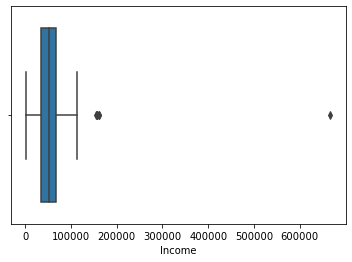

In [24]:
sns.boxplot(data=df_mkt, x='Income');

**Analyse de possibles outliers (Z score)**

Le score Z est également appelé score standard. Ce score aide à comprendre si une valeur de données est supérieure ou inférieure à la moyenne et à quelle distance elle est de la moyenne. Plus précisément, le score Z indique le nombre d’écarts types par rapport à la moyenne d’un point de données.

Score Z = (x -moyen) / std. déviation

Score Z et valeurs aberrantes:
si le score z d’un point de données est supérieur à 3, cela indique que le point de données est assez différent des autres points de données. Un tel point de données peut être une valeur aberrante. 

In [25]:
z_scores = np.abs(st.zscore(df_mkt[['Income']]))
filtre = (z_scores < 3).all(axis=1)
df_posoutliers = df_mkt[~filtre]
df_posoutliers

,ID,Age,Education,Marital_Status,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,AccCmp3,AccCmp4,AccCmp5,AccCmp1,AccCmp2,Complain,Response
164,8475,42,PhD,Married,1,157243.00,0,1,306,98,1608,20,2,1582,1,2,1,22,15,0,22,0,0,0,0,0,0,0,0,0,0
617,1503,39,PhD,Together,2,162397.00,1,1,577,31,107,85,1,16,2,1,2,1,0,0,0,1,1,0,0,0,0,0,0,0,0
655,5555,40,Graduation,Divorced,0,153924.00,0,0,328,81,6,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
687,1501,33,PhD,Married,0,160803.00,0,0,880,21,1717,55,16,1622,17,3,4,29,15,0,28,1,0,0,0,0,0,0,0,0,0
1300,5336,44,Master,Together,1,157733.00,1,0,576,37,59,39,1,9,2,0,8,2,0,1,0,1,1,0,0,0,0,0,0,0,0
1653,4931,38,Graduation,Together,0,157146.00,0,0,612,13,1730,1,0,1725,2,1,1,28,0,0,28,0,1,0,0,0,0,0,0,0,0
2132,11181,66,PhD,Married,0,156924.00,0,0,490,85,8,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2233,9432,38,Graduation,Together,1,666666.00,1,0,578,23,62,9,14,18,8,1,12,7,4,3,1,3,6,0,0,0,0,0,0,0,0


In [26]:
threshold = 3
pos_outliers = np.where(z_scores > threshold)
pos_outliers

(array([ 153,  604,  642,  674, 1287, 1636, 2109, 2209]),
 array([0, 0, 0, 0, 0, 0, 0, 0]))

In [27]:
# Supprimer les valeurs atypiques selon Z-score.
df_mkt = df_mkt[filtre]

*Age*

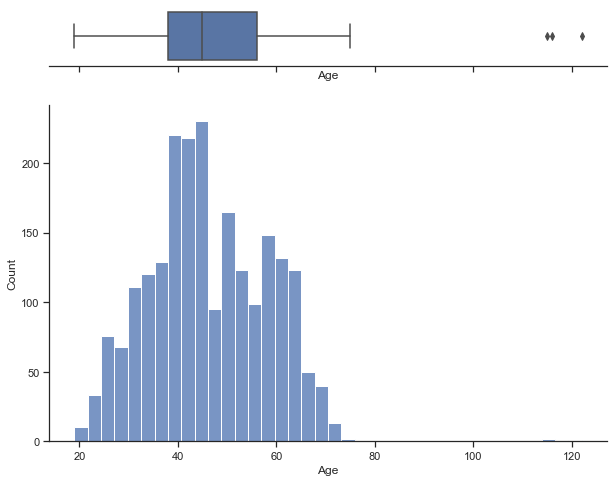

In [28]:
sns.set(style="ticks")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 8))

sns.boxplot(data=df_mkt, x='Age', ax=ax_box)
sns.histplot(data=df_mkt, x='Age', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True);

In [29]:
df_mkt[df_mkt['Age']>100]

,ID,Age,Education,Marital_Status,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,AccCmp3,AccCmp4,AccCmp5,AccCmp1,AccCmp2,Complain,Response
192,7829,115,Master,Divorced,1,36640.00,1,0,462,99,65,15,6,8,7,4,25,5,1,2,1,2,5,0,0,0,0,0,0,1,0
239,11004,122,Master,Single,1,60182.00,0,1,229,23,22,8,0,5,7,0,2,3,1,1,0,2,4,0,0,0,0,0,0,0,0
339,1150,116,PhD,Together,0,83532.00,0,0,462,36,1853,755,144,562,104,64,224,14,1,4,6,4,1,1,0,0,1,0,0,0,0


In [30]:
# On considère que les âges de plus de 100 ans sont des valeurs aberrantes. Donc on les supprime.
df_mkt.drop([192, 239, 339], inplace=True)

*DealsPurch*

Les DealsPurch ont été prises en compte dans les canaux de vente. Donc on a l'intérêt de contrôler s'il y a des clients où la quantité de Deals dépasse la quantité d'achats dans les canaux.

In [31]:
df_mkt[df_mkt['DealsPurch']>df_mkt['TotalPurch']]

,ID,Age,Education,Marital_Status,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,AccCmp3,AccCmp4,AccCmp5,AccCmp1,AccCmp2,Complain,Response
1042,10749,24,Graduation,Single,0,8028.00,0,0,835,62,178,73,18,66,7,12,2,1,15,0,1,0,19,0,0,0,0,0,0,0,0
1245,6862,44,Graduation,Divorced,0,1730.00,0,0,228,65,8,1,1,3,1,1,1,0,15,0,0,0,20,0,0,0,0,0,0,0,0
1846,9931,52,PhD,Married,2,4023.00,1,1,192,29,9,5,0,1,1,1,1,0,15,0,0,0,19,0,0,0,0,0,0,0,0


Deux de ces trois individus ne rapportent pas d’achats dans aucun canal de vente et ils ont acheté plus de fois avec de remises que le montant total de produits achetés.

In [32]:
df_mkt[df_mkt['MntTotal']<df_mkt['DealsPurch']]

,ID,Age,Education,Marital_Status,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,AccCmp3,AccCmp4,AccCmp5,AccCmp1,AccCmp2,Complain,Response
1245,6862,44,Graduation,Divorced,0,1730.00,0,0,228,65,8,1,1,3,1,1,1,0,15,0,0,0,20,0,0,0,0,0,0,0,0
1846,9931,52,PhD,Married,2,4023.00,1,1,192,29,9,5,0,1,1,1,1,0,15,0,0,0,19,0,0,0,0,0,0,0,0


Après avoir vérifié que cela n’est pas arrivé avec d' autres individus, nous allons les considérer comme des outliers.

In [33]:
# Les supprimer
df_mkt.drop([1042, 1245, 1846], inplace=True)

*TotalPurch*

In [34]:
df_mkt[df_mkt['TotalPurch']==0]

,ID,Age,Education,Marital_Status,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,AccCmp3,AccCmp4,AccCmp5,AccCmp1,AccCmp2,Complain,Response
981,3955,50,Graduation,Divorced,0,4861.00,0,0,193,20,6,2,1,1,1,0,1,0,0,0,0,0,14,0,0,0,0,0,0,0,0
1524,11110,42,Graduation,Single,1,3502.00,1,0,628,56,5,2,1,1,0,0,1,0,0,0,0,0,14,0,0,0,0,0,0,0,0


On n’est pas sûr que cela soit normal ou que soit un problème de transférence de données où il manque les canaux dans lesquels les ventes ont eu lieu. On décide de garder ces lignes mais à tenir en compte pour le futur.

In [35]:
# Df après mise en forme et nettoyage.
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2202 non-null   object 
 1   Age                2202 non-null   int64  
 2   Education          2202 non-null   object 
 3   Marital_Status     2202 non-null   object 
 4   Childhome          2202 non-null   int64  
 5   Income             2202 non-null   float64
 6   Kidhome            2202 non-null   int64  
 7   Teenhome           2202 non-null   int64  
 8   Days_Engaged       2202 non-null   int64  
 9   Recency            2202 non-null   int64  
 10  MntTotal           2202 non-null   int64  
 11  Wines              2202 non-null   int64  
 12  Fruits             2202 non-null   int64  
 13  Meat               2202 non-null   int64  
 14  Fish               2202 non-null   int64  
 15  Sweets             2202 non-null   int64  
 16  Gold               2202 

## 1 EDA - (Analyse univarié et bivarié des variables) <a class="anchor" id="chapter1"></a>

- 1.1 Analyse univarié des variables
- 1.2 Analyse bivarié des variables

### 1.1 Analyse univarié des variables <a class="anchor" id="section_1_1"></a>

#### Variables demographiques catégoriques:

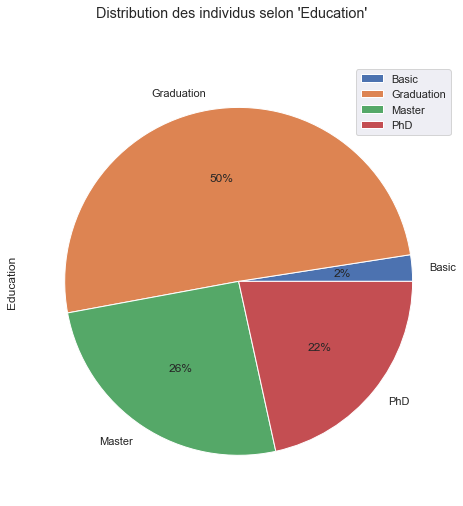

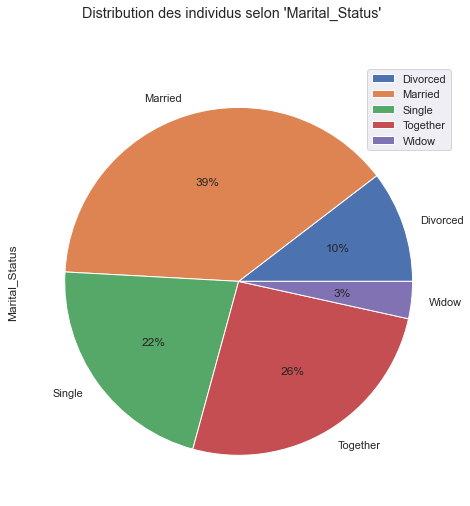

In [36]:
for col in df_mkt[['Education', 'Marital_Status']]:
    sns.set()
    df_mkt.groupby([col]).agg({col:'count'}).plot(kind='pie', figsize=(8,8), autopct='%1.0f%%',
                                                  title="Distribution des individus selon '" +col+"'",
                                                  subplots=True)
    plt.savefig('Graphiques/distrib_'+col+'.png', bbox_inches='tight');

#### Acceptation des campagnes

In [37]:
acc_camp = df_mkt[['AccCmp1', 'AccCmp2', 'AccCmp3', 'AccCmp4', 'AccCmp5','Response']]

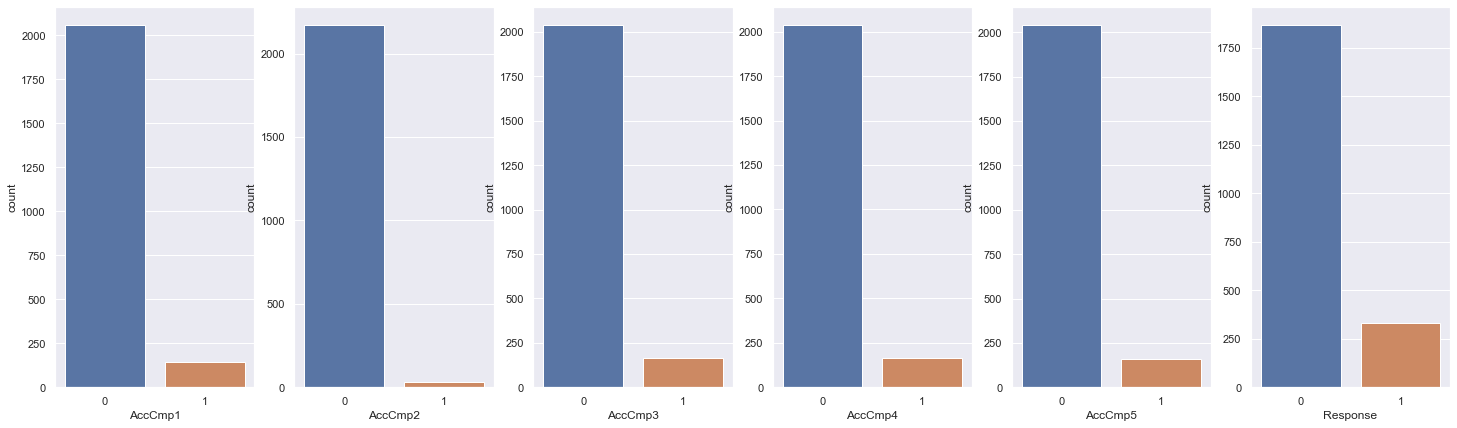

In [38]:
plt.figure(figsize=(25,7))
for i, c in enumerate(acc_camp, 1):
    plt.subplot(1,6,i) 
    ax = sns.countplot(x=c,data=df_mkt);

,Sum,Prop
AccCmp1,142,0.06
AccCmp2,30,0.01
AccCmp3,163,0.07
AccCmp4,164,0.07
AccCmp5,161,0.07
Response,333,0.15


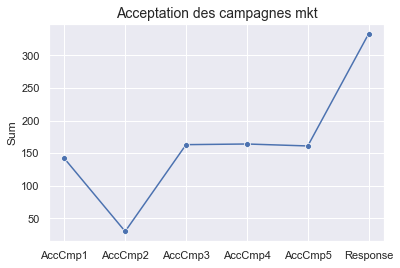

In [39]:
camp = []
campagne = []
camp_cum = 0

for col in acc_camp:
    camp = acc_camp[col].sum()
    campagne.append(camp)
    camp_cum = camp_cum + camp

df_camp = pd.DataFrame(campagne, columns=['Sum'],index=acc_camp.columns)
df_camp['Prop'] = df_camp['Sum'] / len(df_mkt)

#Graphique
sns.set()
sns.lineplot(x=df_camp.index, y=df_camp.Sum, marker='o')
plt.title("Acceptation des campagnes mkt", fontsize=14)
plt.savefig('Graphiques/acc_cmpg.png', dpi=1000);
df_camp

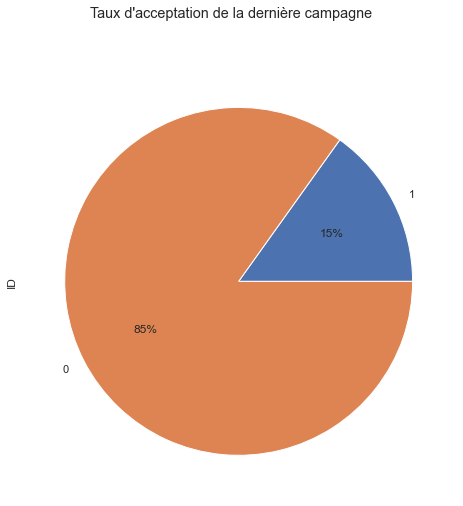

In [40]:
resp= df_mkt.groupby('Response').agg('count')
type_labels = resp['ID'].sort_values().index 
type_counts = resp['ID'].sort_values()

sns.set()
type_counts.plot(labels=type_labels, kind='pie', figsize=(8,8), autopct='%1.0f%%', title="Taux d'acceptation de la dernière campagne", subplots=True)
plt.savefig('Graphiques/acc_resp.png', bbox_inches='tight');

La dernière campagne (‘Response’) a eu le plus de succès avec 333 d’acceptations. 15% des clients de notre base de données ont accepté cette campagne.

La deuxième campagne (‘AccCmp2’) a été la moins acceptée, Seulement 1% des clients de notre base de données l'a acceptée.

#### Variables demographiques numériques:

Age

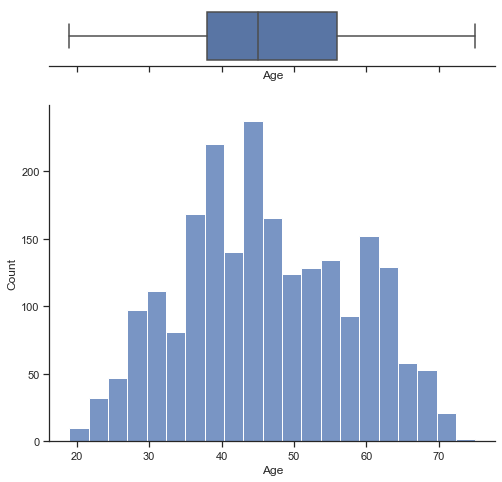

In [41]:
sns.set(style="ticks")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)}, figsize=(8, 8))

sns.boxplot(data=df_mkt, x='Age', ax=ax_box)
sns.histplot(data=df_mkt, x='Age', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True);

Enfants à la maison

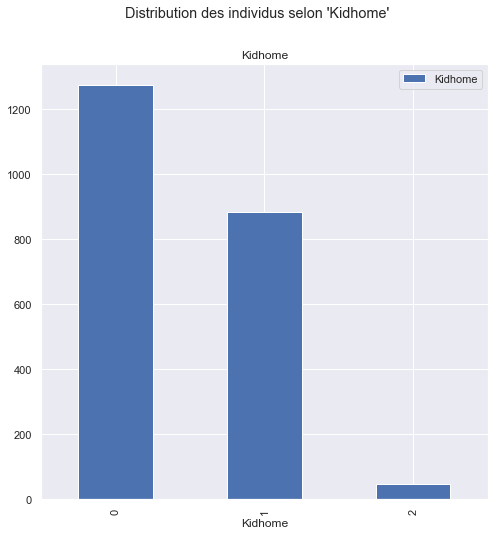

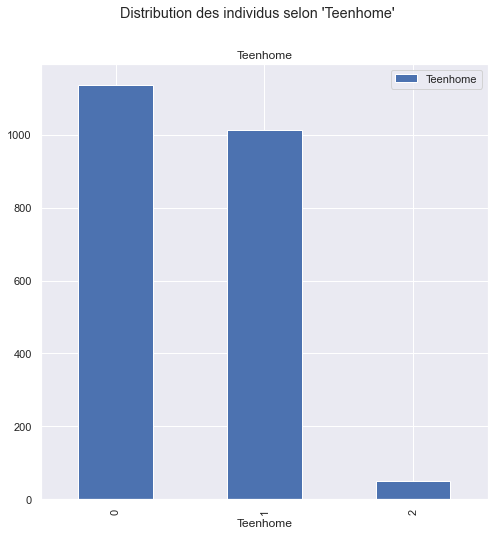

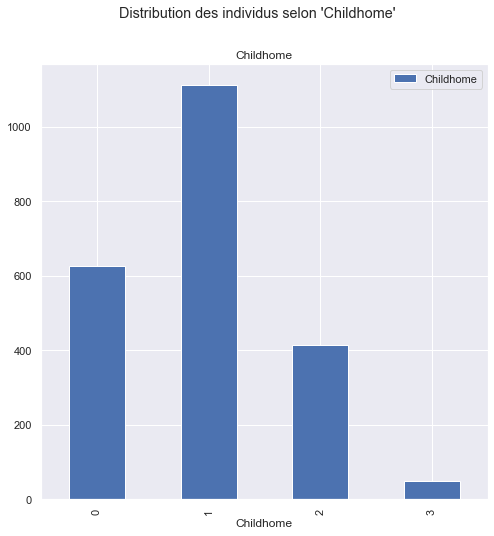

In [42]:
for col in df_mkt[['Kidhome', 'Teenhome', 'Childhome']]:
    sns.set()
    df_mkt.groupby([col]).agg({col:'count'}).plot(kind='bar', figsize=(8,8),
                                                  title="Distribution des individus selon '" +col+"'",
                                                  subplots=True);

Revenu

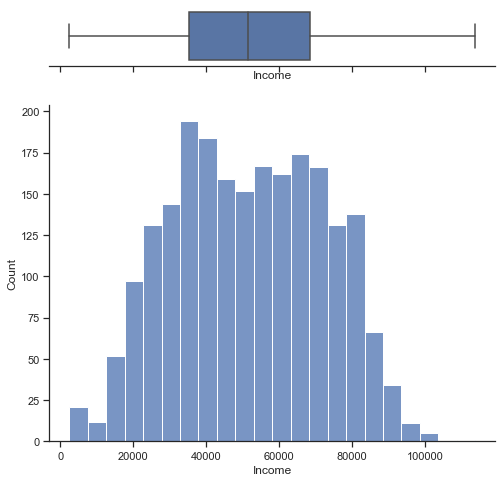

In [43]:
sns.set(style="ticks")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)}, figsize=(8, 8))

sns.boxplot(data=df_mkt, x='Income', ax=ax_box)
sns.histplot(data=df_mkt, x='Income', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True);

#### Comportement du consommateur

Fidélité client

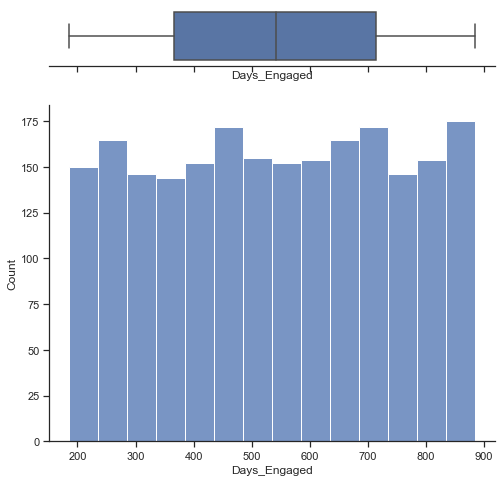

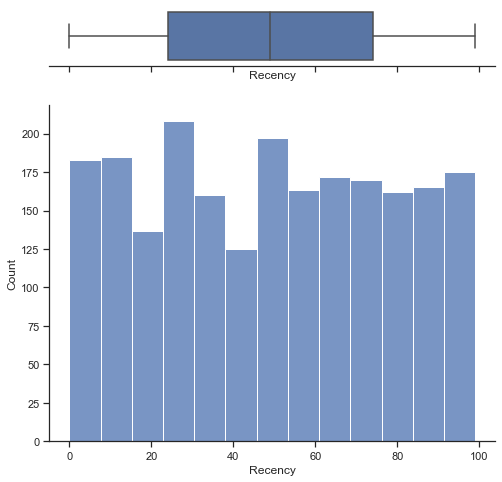

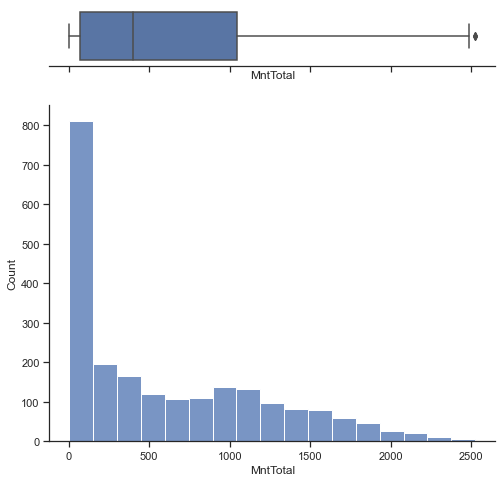

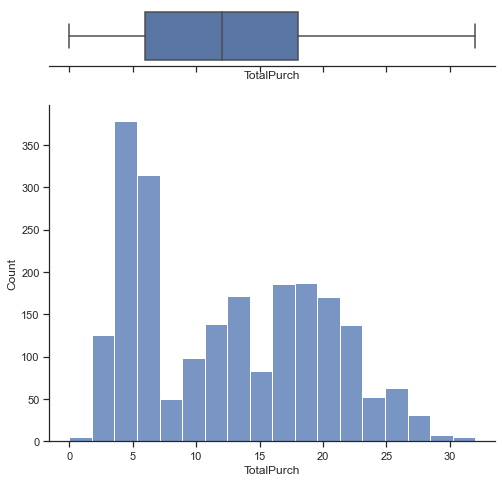

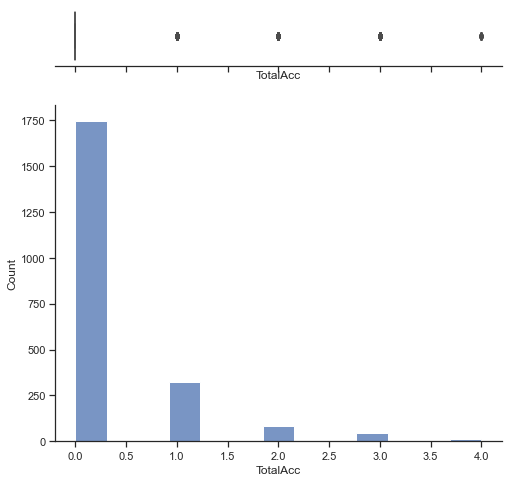

In [44]:
for col in df_mkt[['Days_Engaged', 'Recency', 'MntTotal', 'TotalPurch', 'TotalAcc']]:
    sns.set(style="ticks")

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)}, figsize=(8, 8))

    sns.boxplot(data=df_mkt, x=col, ax=ax_box)
    sns.histplot(data=df_mkt, x=col, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True);

#### Meilleurs clients

In [45]:
# Ordonnés par montant total de produits: 
mc_mnt = df_mkt.sort_values(by='MntTotal', ascending=False).head(15)
mc_mnt

,ID,Age,Education,Marital_Status,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,AccCmp3,AccCmp4,AccCmp5,AccCmp1,AccCmp2,Complain,Response
1179,5735,24,Master,Single,0,90638.00,0,0,322,29,2525,1156,120,915,94,144,96,17,1,3,4,10,1,1,0,0,1,0,0,0,0
1572,5350,24,Master,Single,0,90638.00,0,0,322,29,2525,1156,120,915,94,144,96,17,1,3,4,10,1,1,0,0,1,0,0,0,1
1492,1763,27,Graduation,Together,0,87679.00,0,0,523,62,2524,1259,172,815,97,148,33,28,1,7,11,10,4,3,1,0,1,1,0,0,1
987,4580,46,Graduation,Married,0,75759.00,0,0,433,46,2486,1394,22,708,89,91,182,25,1,9,7,9,5,3,1,0,1,1,0,0,1
1052,4475,66,PhD,Married,0,69098.00,0,0,684,82,2440,1315,22,780,145,0,178,24,1,7,8,9,5,0,0,0,0,0,0,0,0
1601,5453,59,Master,Married,0,90226.00,0,0,827,26,2352,1083,108,649,253,151,108,23,1,4,7,12,2,1,0,0,0,1,0,0,0
1458,10133,45,Graduation,Single,0,93790.00,0,0,323,16,2349,1302,68,731,89,114,45,25,0,6,7,12,2,3,0,1,1,1,0,0,1
1288,9010,43,Master,Married,0,83151.00,0,0,690,80,2346,968,147,842,137,42,210,22,1,5,7,10,2,3,1,0,1,1,0,0,1
943,5386,62,Graduation,Together,0,94384.00,0,0,668,62,2302,1111,24,790,160,45,172,18,0,5,8,5,2,3,0,1,1,1,0,0,1
1301,6024,62,Graduation,Together,0,94384.00,0,0,668,62,2302,1111,24,790,160,45,172,18,0,5,8,5,2,3,0,1,1,1,0,0,1


In [46]:
#Ordonnés par total d’achats:
mc_purch = df_mkt.sort_values(by='TotalPurch', ascending=False).head(15)
mc_purch

,ID,Age,Education,Marital_Status,Childhome,Income,Kidhome,Teenhome,Days_Engaged,Recency,MntTotal,Wines,Fruits,Meat,Fish,Sweets,Gold,TotalPurch,DealsPurch,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth,TotalAcc,AccCmp3,AccCmp4,AccCmp5,AccCmp1,AccCmp2,Complain,Response
1252,5153,48,PhD,Married,1,77766.00,0,1,678,97,1529,1004,59,265,115,59,27,32,2,11,10,11,6,1,1,0,0,0,0,0,1
1669,4127,48,PhD,Married,1,77766.00,0,1,678,97,1529,1004,59,265,115,59,27,32,2,11,10,11,6,1,1,0,0,0,0,0,1
412,7030,60,PhD,Married,1,66465.00,0,1,642,1,1485,1200,0,204,38,29,14,32,3,11,9,12,6,1,0,0,0,1,0,0,0
67,9369,36,Master,Single,1,88194.00,0,1,288,19,1274,688,14,309,201,24,38,31,1,11,10,10,5,2,1,0,0,1,0,0,1
636,6945,63,Graduation,Single,0,84574.00,0,0,576,72,1375,387,20,713,38,54,163,31,1,9,11,11,5,0,0,0,0,0,0,0,0
646,4611,45,Graduation,Together,0,105471.00,0,0,710,36,1724,1009,181,104,202,21,207,30,0,9,8,13,3,2,0,0,1,1,0,0,1
1674,3389,45,Graduation,Married,1,69016.00,0,1,770,61,1533,726,53,363,123,107,161,30,4,8,9,13,5,0,0,0,0,0,0,0,0
470,2021,40,Graduation,Married,1,61456.00,0,1,645,47,1388,563,76,384,84,192,89,29,4,6,10,13,4,0,0,0,0,0,0,0,0
681,4910,48,Graduation,Divorced,0,68743.00,0,0,854,81,2074,1132,134,384,175,134,115,29,1,11,5,13,7,0,0,0,0,0,0,0,0
1212,2324,43,Graduation,Together,1,77044.00,0,1,431,12,1065,625,38,242,50,34,76,29,2,7,11,11,4,1,1,0,0,0,0,0,0


#### Produits achetés

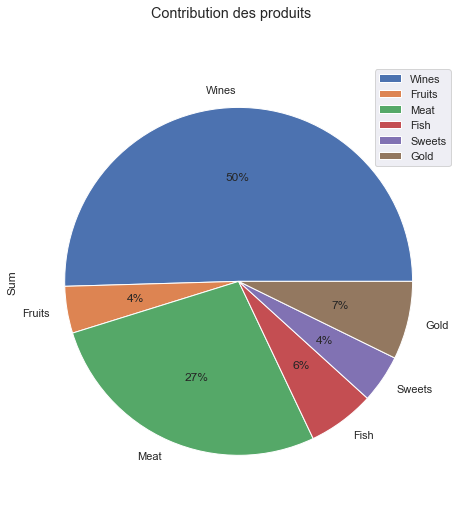

In [47]:
prod = []
product = []
prod_cum = 0

for col in df_mkt[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]:
    prod = df_mkt[col].sum()
    product.append(prod)
    prod_cum = prod_cum + prod

df_prod = pd.DataFrame(product, columns=["Sum"],index=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'])

sns.set()
df_prod.plot(kind='pie', figsize=(8,8), autopct='%1.0f%%', title="Contribution des produits", subplots=True)
plt.savefig('Graphiques/contrib_prod.png', bbox_inches='tight');

In [48]:
df_prod

,Sum
Wines,675014
Fruits,58200
Meat,364443
Fish,83244
Sweets,59804
Gold,97142


- Les vins représentent 50% des achats de nos produits. 
- Les produits de viande représentent presque 30%.
- Les fruits, les produits sucrés, les produits de poisson et les produits d’or, représentent entre 4 et 7% chacun.

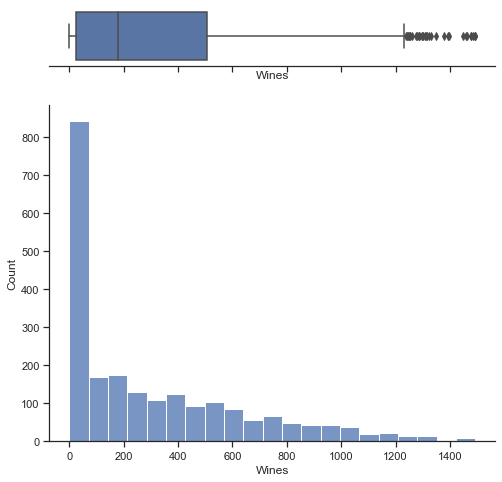

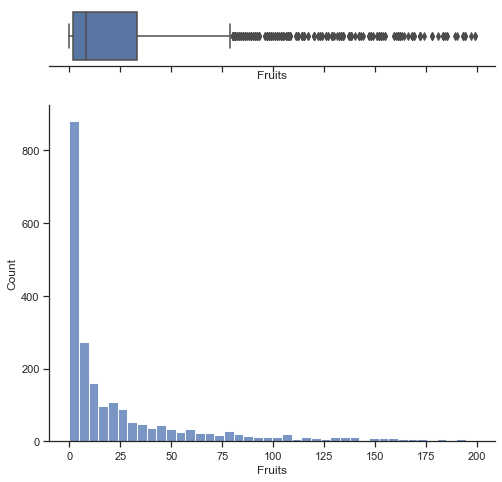

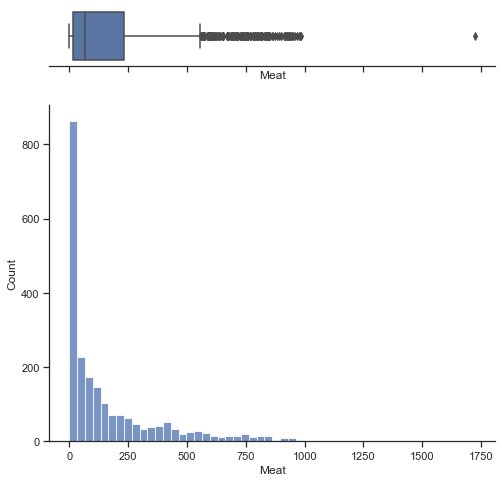

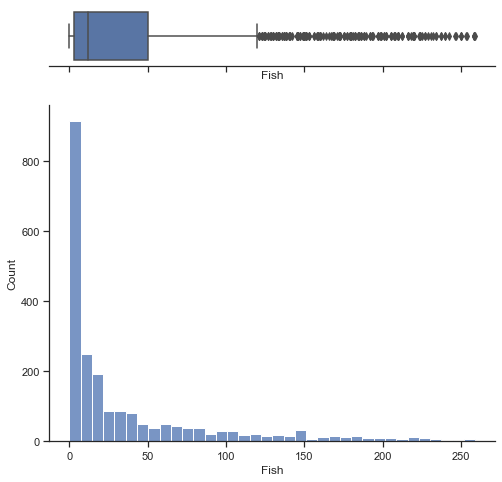

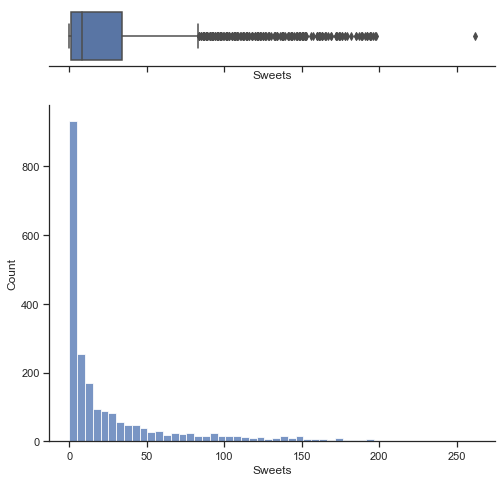

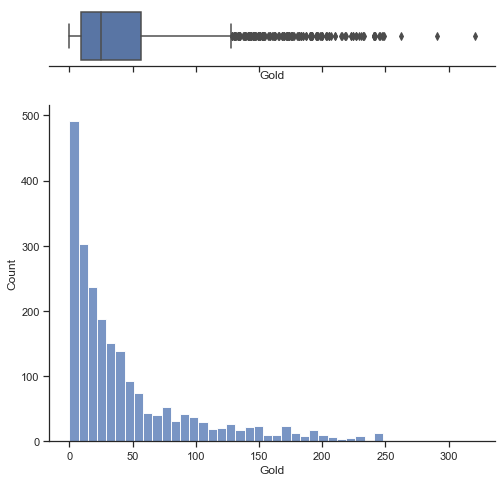

In [49]:
for col in df_mkt[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]:
    sns.set(style="ticks")

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)}, figsize=(8, 8))

    sns.boxplot(data=df_mkt, x=col, ax=ax_box)
    sns.histplot(data=df_mkt, x=col, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True);


#### Canaux de vente, réductions et nombre de visites par mois

,Sum
WebPurch,9042
CatalogPurch,5832
StorePurch,12841


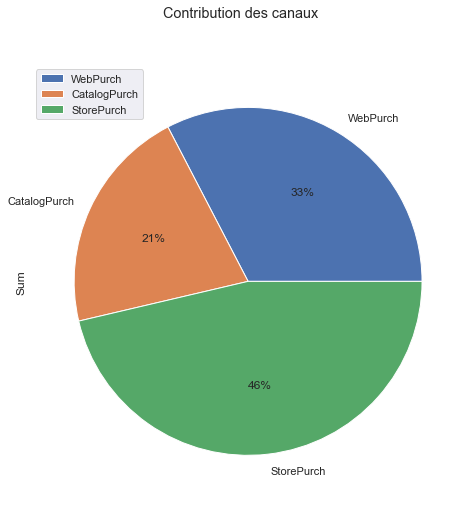

In [50]:
can = []
canaux = []
can_cum = 0

for col in df_mkt[['WebPurch', 'CatalogPurch', 'StorePurch']]:
    can = df_mkt[col].sum()
    canaux.append(can)
    can_cum = can_cum + can

df_can = pd.DataFrame(canaux, columns=["Sum"],index=['WebPurch', 'CatalogPurch', 'StorePurch'])

sns.set()
df_can.plot(kind='pie', figsize=(8,8), autopct='%1.0f%%', title="Contribution des canaux", subplots=True)
plt.savefig('Graphiques/contrib_canaux.png', bbox_inches='tight');
df_can

In [51]:
print("Total d'achats effectués avec remise: {}".format(df_mkt['DealsPurch'].sum()))
print("Proportion d'achats effectués avec remise: {}".format(df_mkt['DealsPurch'].sum()/df_mkt['TotalPurch'].sum()))

Total d'achats effectués avec remise: 5067
Proportion d'achats effectués avec remise: 0.1828251849179145


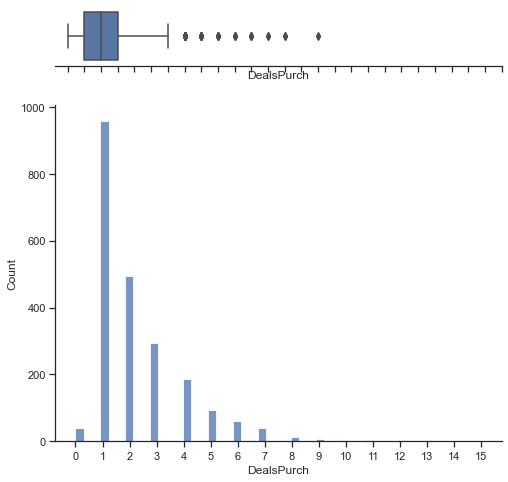

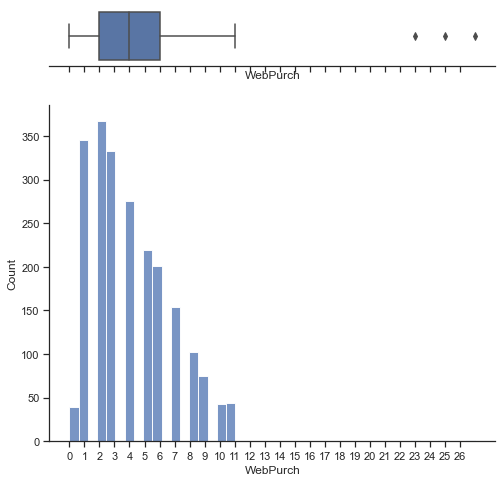

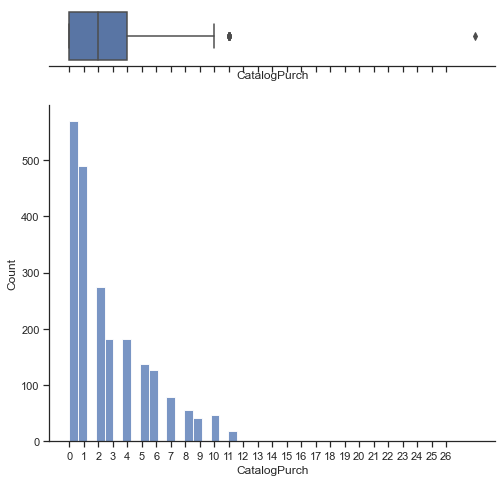

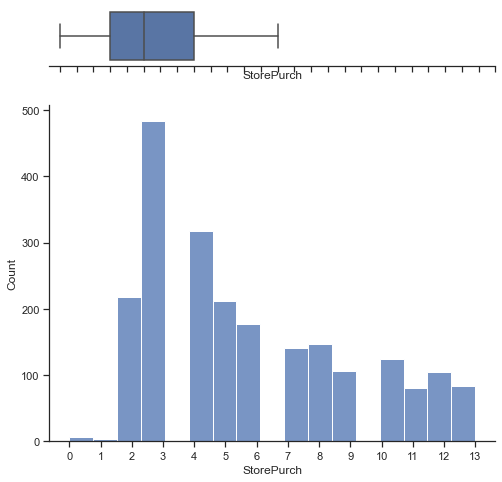

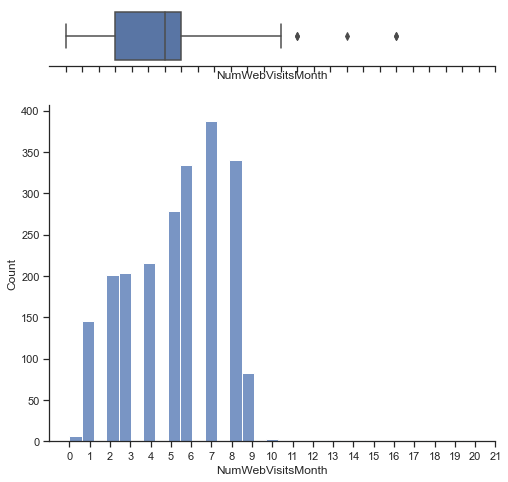

In [52]:
for col in df_mkt[['DealsPurch', 'WebPurch', 'CatalogPurch', 'StorePurch', 'NumWebVisitsMonth']]:
    sns.set(style="ticks")

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)}, figsize=(8, 8))

    sns.boxplot(data=df_mkt, x=col, ax=ax_box)
    sns.histplot(data=df_mkt, x=col, ax=ax_hist)

    ax_box.set(yticks=[])
    ax_box.set(xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True);

Les achats ont lieu principalement dans les magasins (46%).

### 1.2 Analyse bivarié des variables <a class="anchor" id="section_1_2"></a>

#### Données du client et acceptation des campagnes

_Niveau d'éducation_

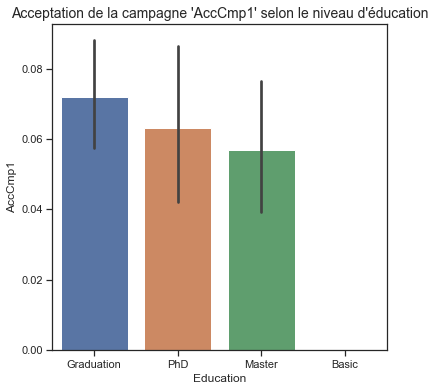

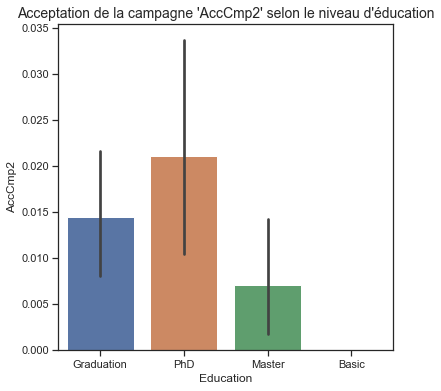

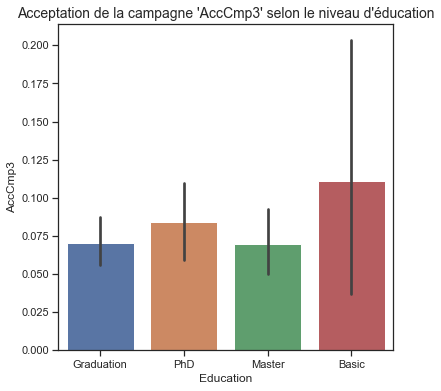

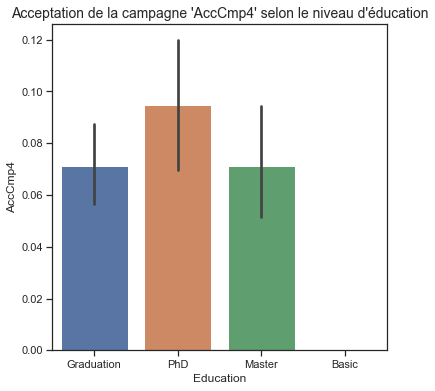

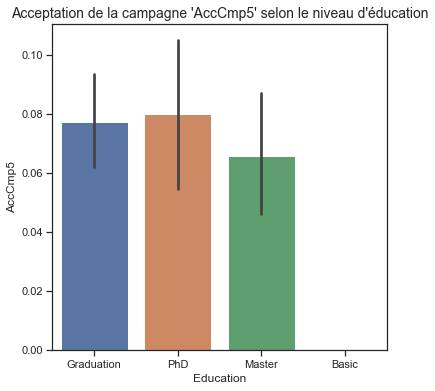

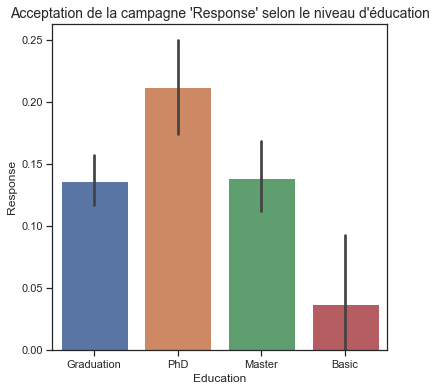

In [53]:
for col in df_mkt[['AccCmp1', 'AccCmp2', 'AccCmp3', 'AccCmp4', 'AccCmp5','Response']]:
    plt.figure(figsize=(6, 6))
    sns.barplot(x='Education',y=col,data = df_mkt).set_title("Acceptation de la campagne '" + col + "' selon le niveau d'éducation", fontsize=14);

_Situation maritale_

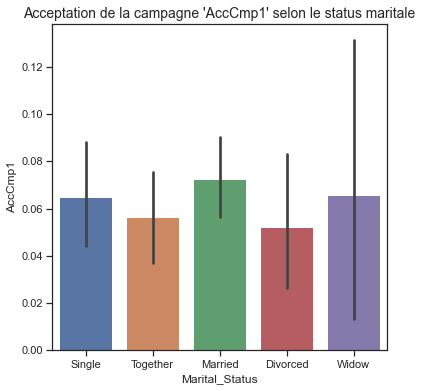

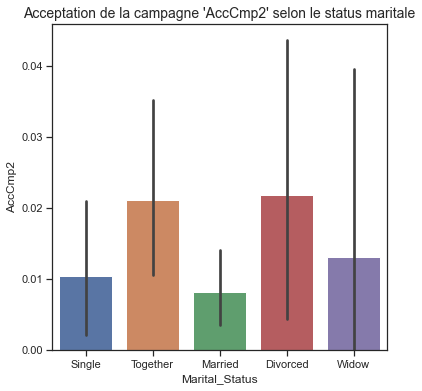

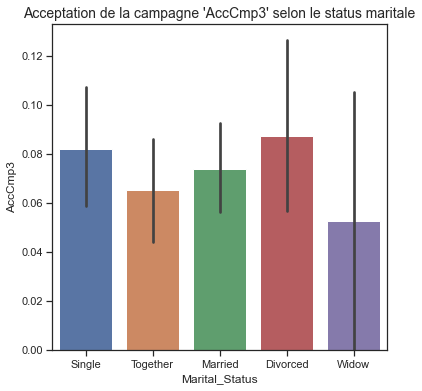

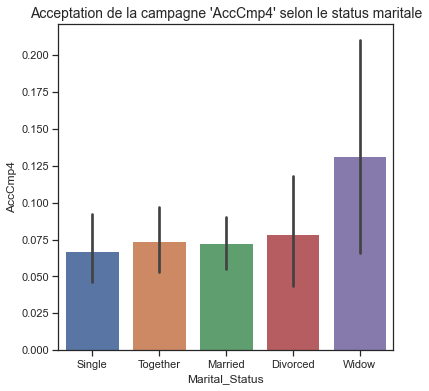

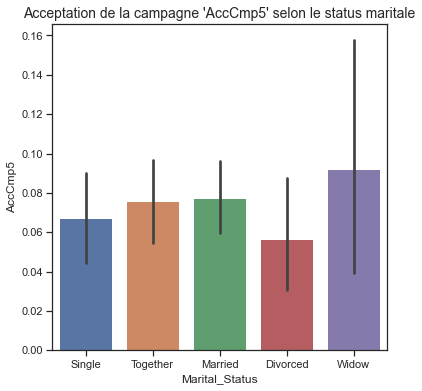

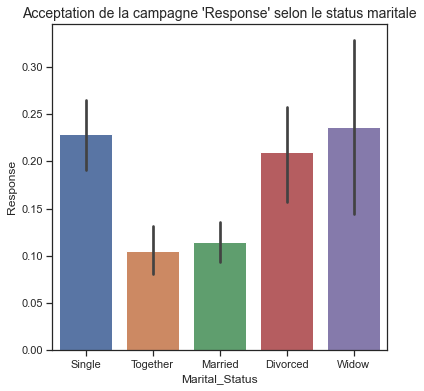

In [54]:
for col in df_mkt[['AccCmp1', 'AccCmp2', 'AccCmp3', 'AccCmp4', 'AccCmp5','Response']]:
    plt.figure(figsize=(6, 6))
    sns.barplot(x='Marital_Status',y=col,data = df_mkt).set_title("Acceptation de la campagne '" + col + "' selon le status maritale", fontsize=14);

_Données quantitatives_

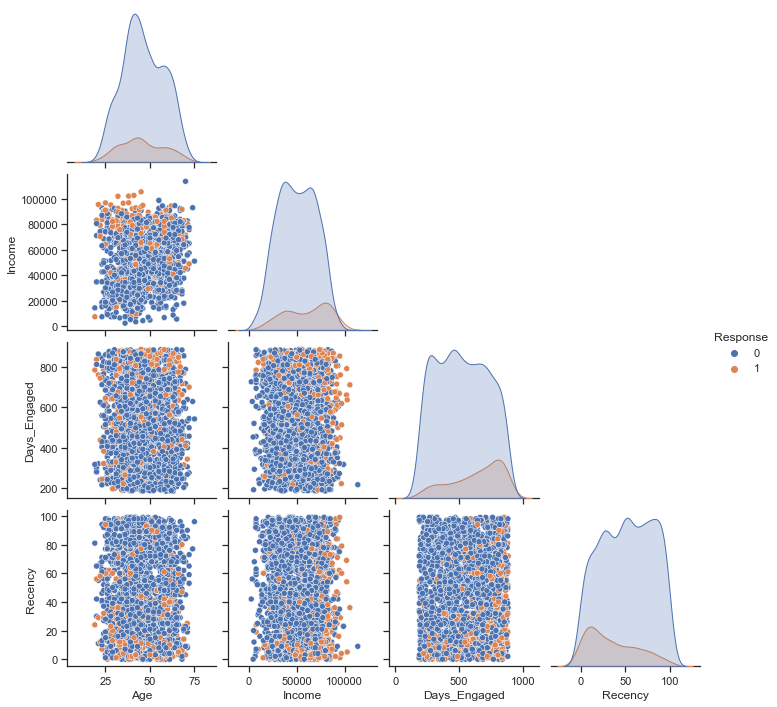

In [55]:
#Scatterplot
sns.pairplot(df_mkt, vars=['Age', 'Income', 'Days_Engaged', 'Recency'],
             hue='Response', corner=True);

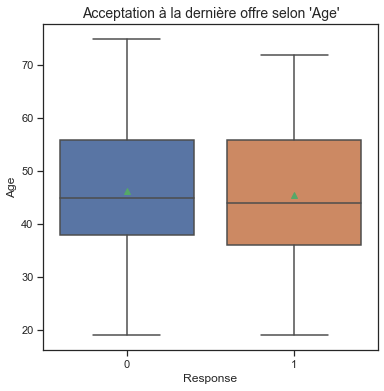

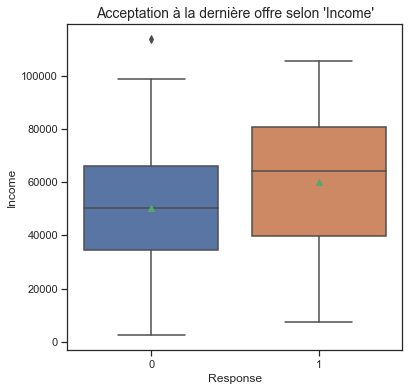

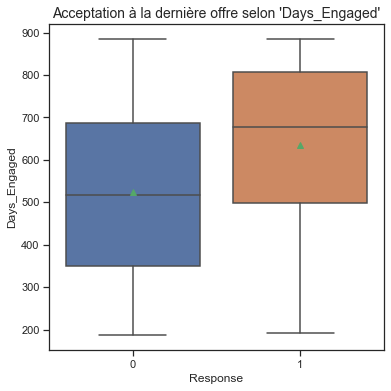

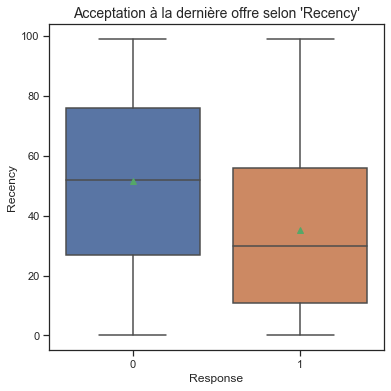

In [56]:
#Boxplot
for col in df_mkt[['Age', 'Income', 'Days_Engaged', 'Recency']]:
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=df_mkt,y=col, x='Response', showmeans=True).set_title("Acceptation à la dernière offre selon '" + col + "'", fontsize=14)

_Produits achetés_

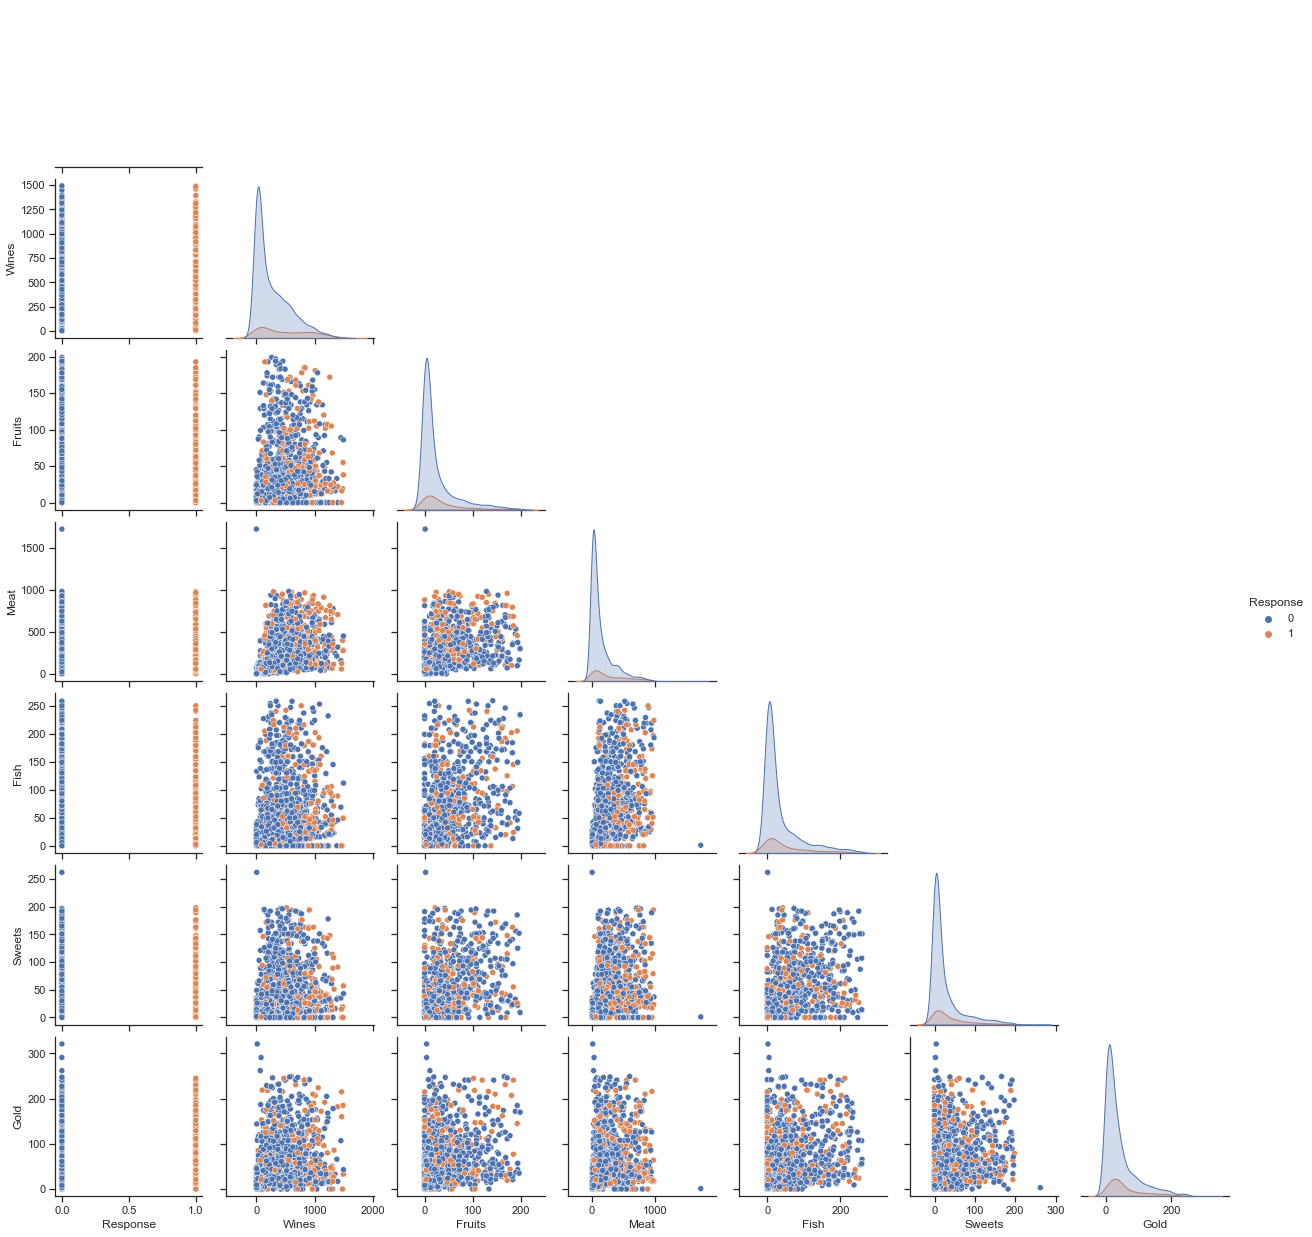

In [57]:
#Scatterplot
sns.pairplot(df_mkt, vars=['Response', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'],
             hue='Response', corner=True);

_Canaux de vente, réductions et nombre de visites par mois_

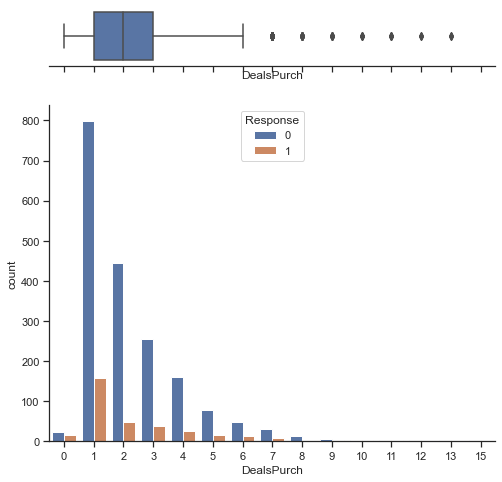

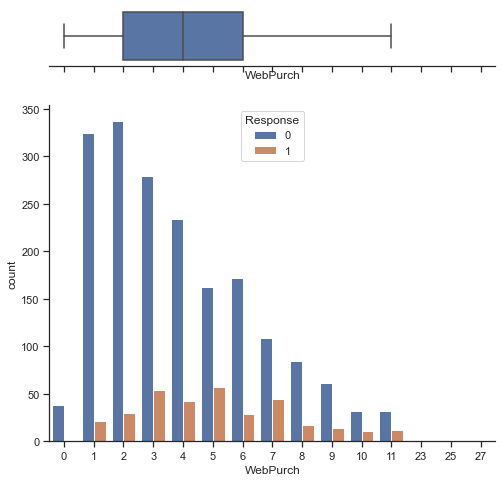

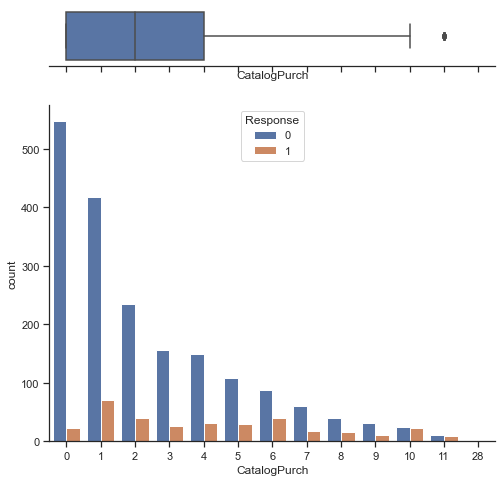

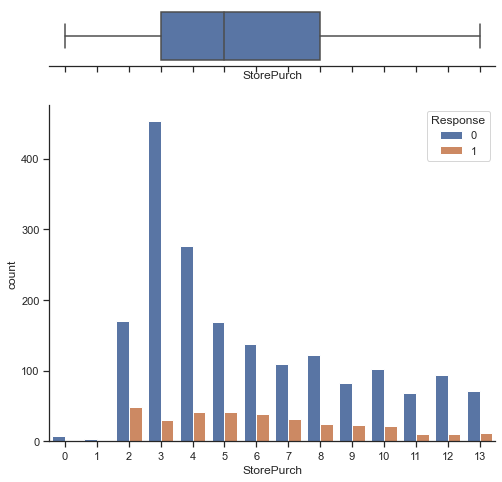

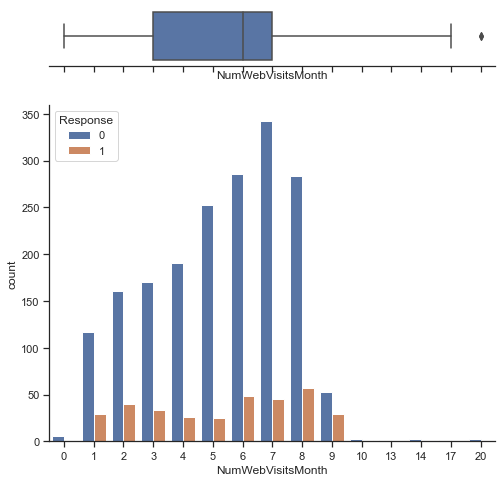

In [58]:
for col in df_mkt[['DealsPurch', 'WebPurch', 'CatalogPurch', 'StorePurch', 'NumWebVisitsMonth']]:
    sns.set(style="ticks")

    f, (ax_box, ax_count) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)}, figsize=(8, 8))

    sns.boxplot(data=df_mkt, x=col, ax=ax_box)
    sns.countplot(data=df_mkt, x=col, hue='Response', ax=ax_count)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_count)
    sns.despine(ax=ax_box, left=True);


_Relation entre réductions et canaux de vente_

In [59]:
deals_count = df_mkt.groupby(['DealsPurch']).agg({'WebPurch' : 'nunique',
                                           'CatalogPurch' : 'nunique',
                                           'StorePurch' : 'nunique',
                                           'NumWebVisitsMonth' : 'nunique'})
deals_count

,WebPurch,CatalogPurch,StorePurch,NumWebVisitsMonth
DealsPurch,,,,
0,11,12,12,10
1,12,12,13,12
2,11,12,12,9
3,11,11,12,8
4,11,12,12,9
5,11,8,11,8
6,8,8,11,7
7,10,7,8,7
8,8,5,5,4


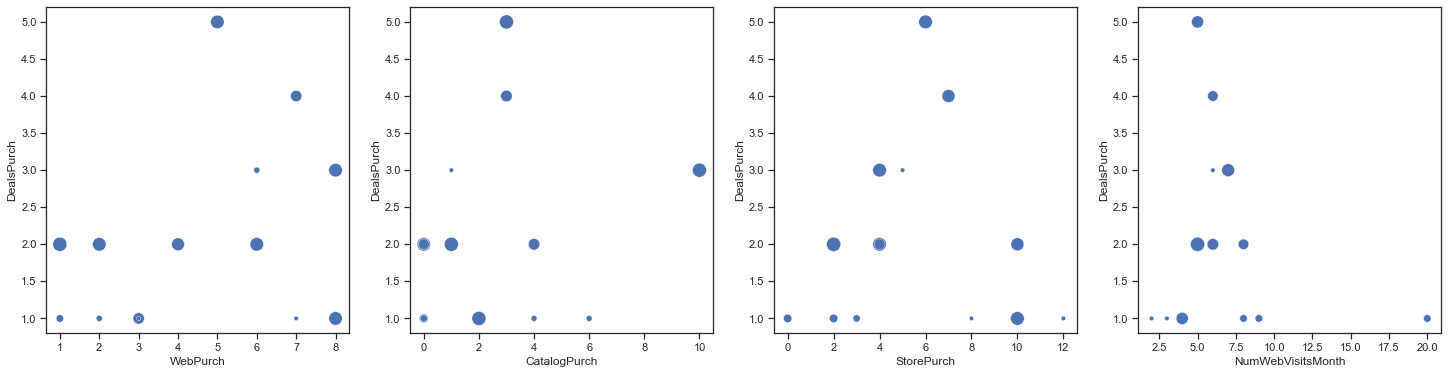

In [60]:
can = df_mkt[['WebPurch', 'CatalogPurch', 'StorePurch', 'NumWebVisitsMonth']]
plt.figure(figsize=(25,6))
for i, c in enumerate(can, 1):
    plt.subplot(1,4,i) 
    ax = sns.scatterplot(x=c,y='DealsPurch',data=df_mkt,
                        size=deals_count[c], legend=False, sizes=(20, 200));

#### Préférences des consommateurs et acceptation des campagnes

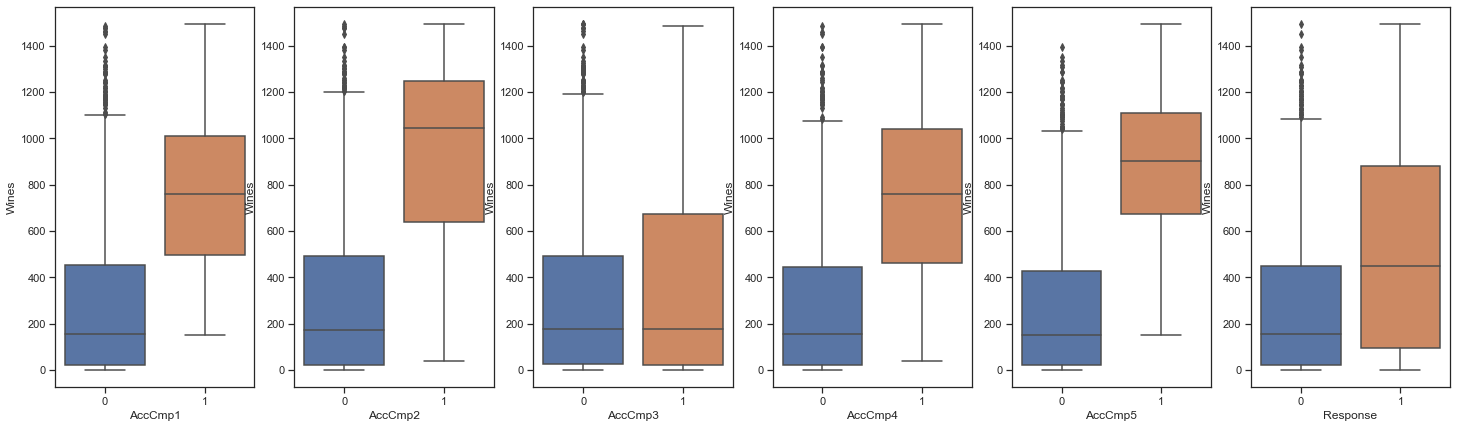

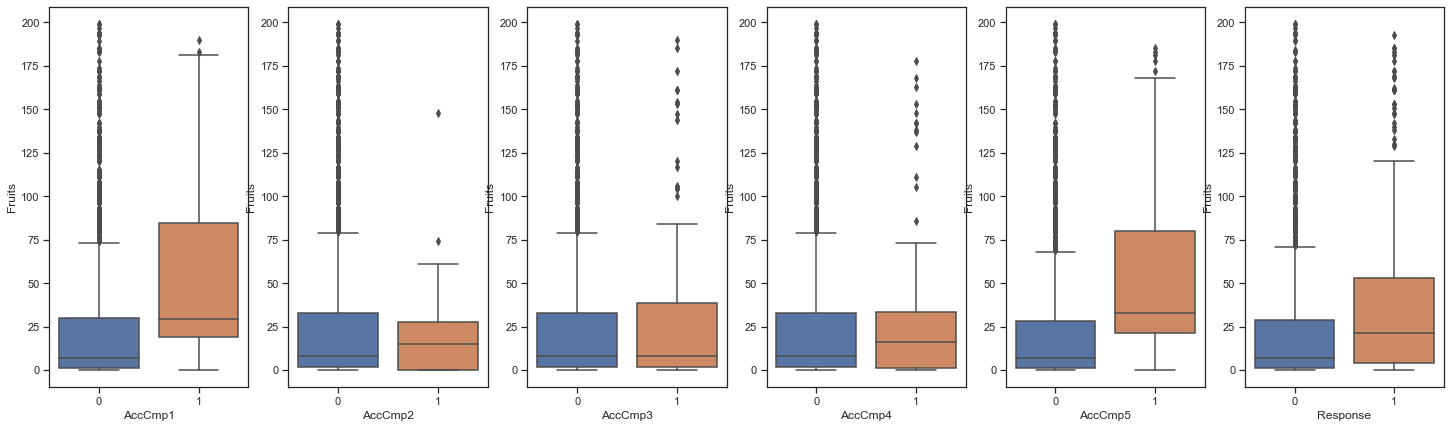

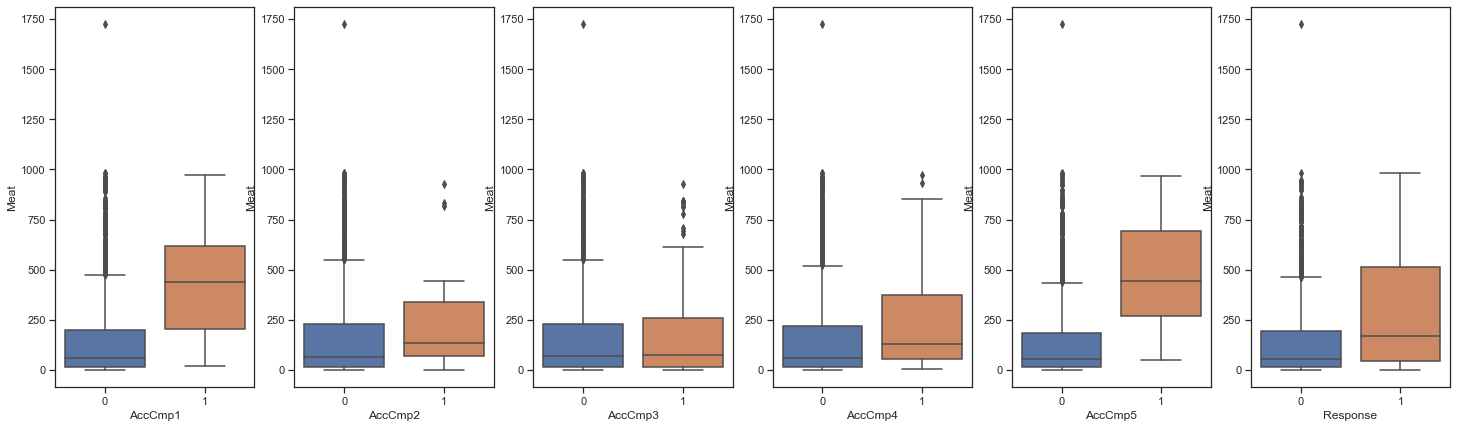

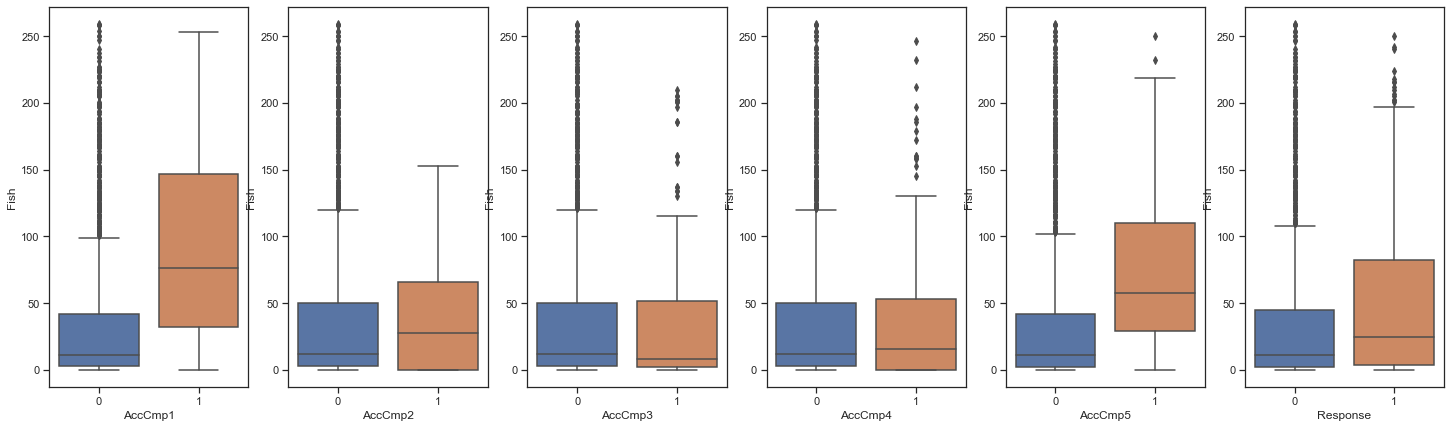

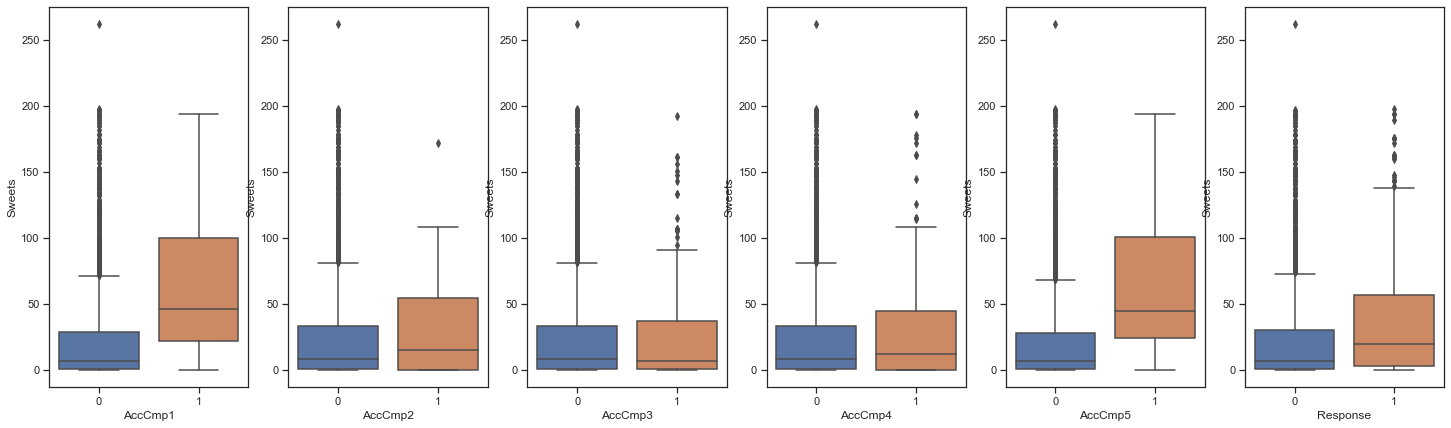

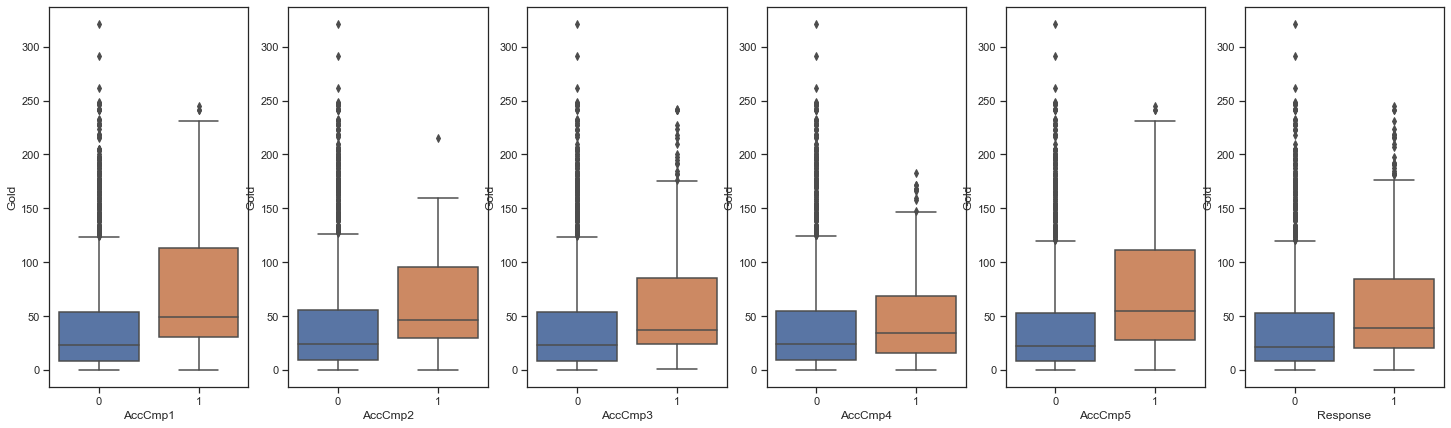

In [61]:
for col in df_mkt[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]:
    plt.figure(figsize=(25,7))
    for i, c in enumerate(acc_camp, 1):
        plt.subplot(1,6,i) 
        g = sns.boxplot(x=c, y=col,data=df_mkt)
        plt.savefig('Graphiques/cmp_'+col+'.png', bbox_inches='tight');

Visuellement, on peut conclure que:
- Les consommateurs de vin ont préféré les campagnes 1, 2, 4, 5 
- Les campagnes 1 et 5 ont eu plus d’acceptation pour les consommateurs de viande, fruits, produits sucrés et poisson.
- Les acheteurs d'or n'ont pas spécialement une campagne qui les différencie du reste. 

### Autres analyses

*Income*

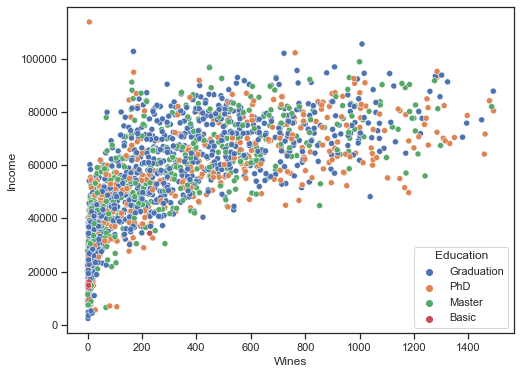

In [62]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.scatterplot(x='Wines',
                     y='Income',
                     hue = 'Education',
                     data = df_mkt,
                     legend='full')

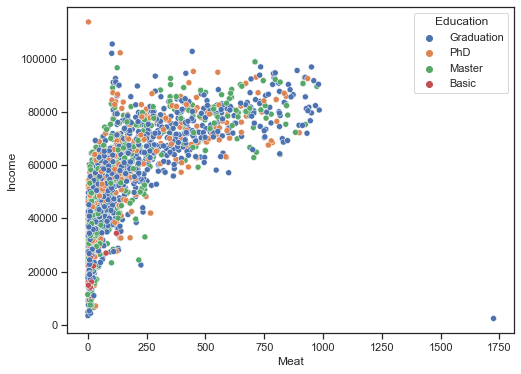

In [63]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.scatterplot(x='Meat',
                     y='Income',
                     hue = 'Education',
                     data = df_mkt,
                     legend='full')

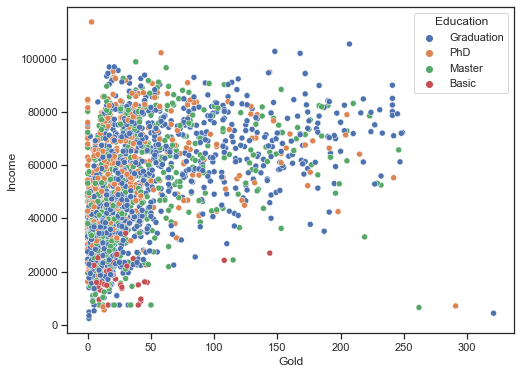

In [64]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.scatterplot(x='Gold',
                     y='Income',
                     hue = 'Education',
                     data = df_mkt,
                     legend='full')

Relation entre acceptation de la dernière campagne, “Complain” et “Marital_Status”.

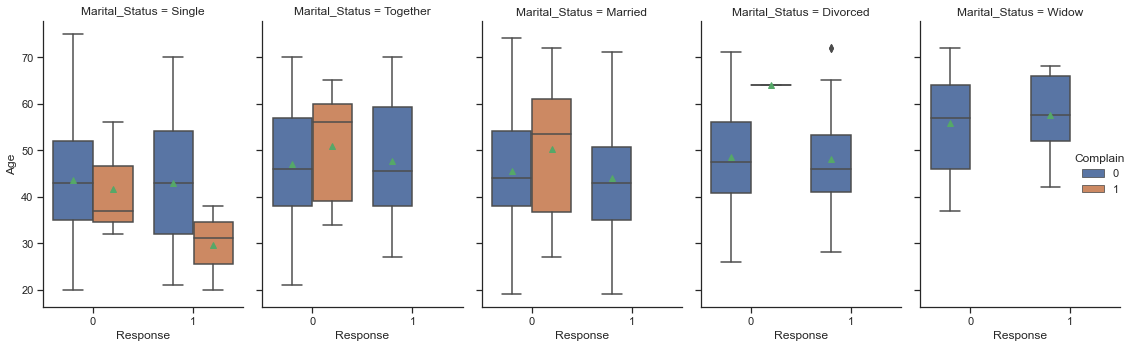

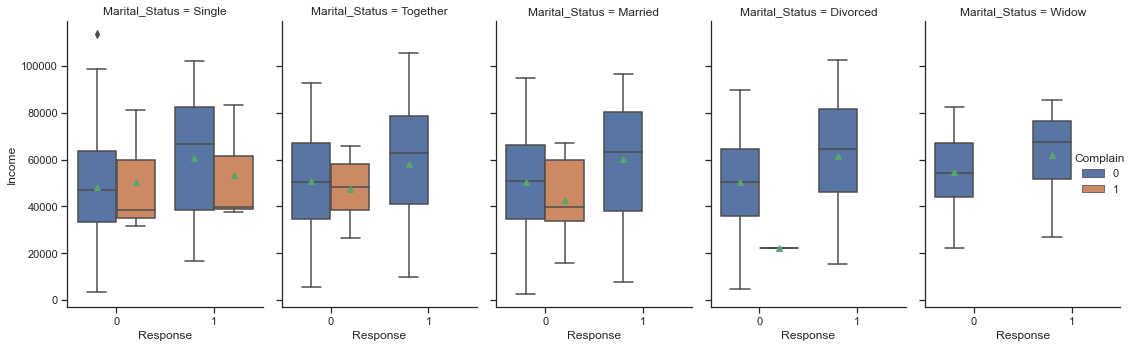

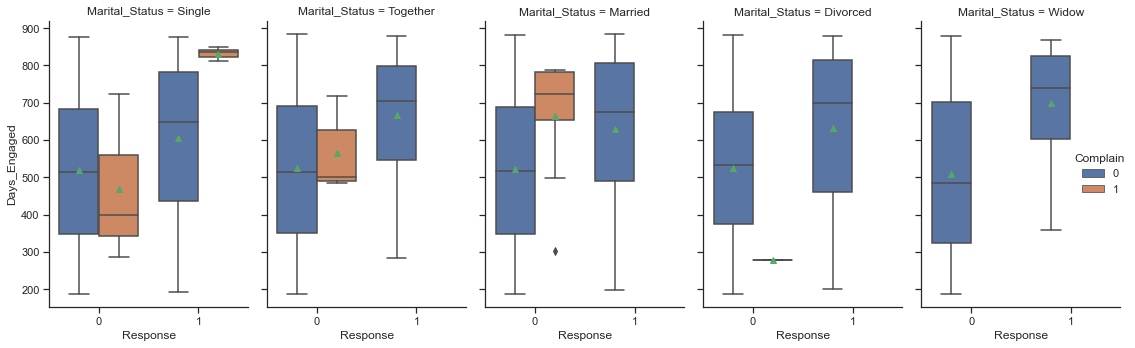

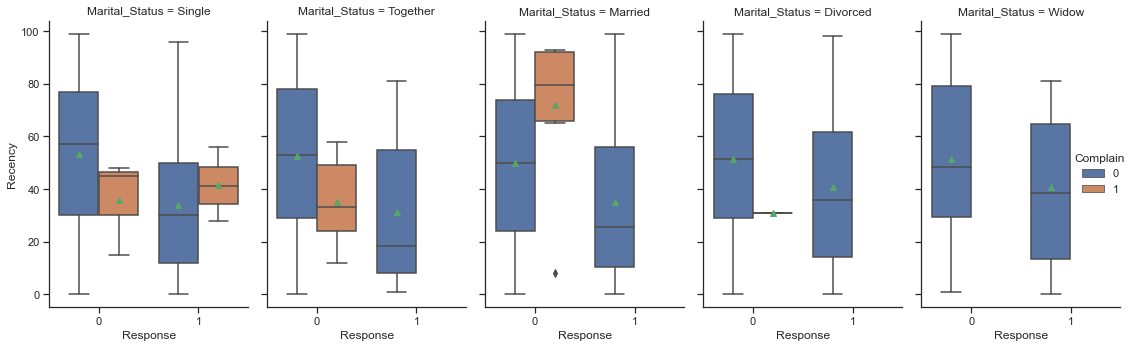

In [65]:
for colum in df_mkt[['Age', 'Income', 'Days_Engaged', 'Recency']]:
    g = sns.catplot(x='Response',y=colum, data=df_mkt,
                    hue='Complain',
                    col = 'Marital_Status',
                    kind='box', showmeans=True,aspect=.6)
    plt.tight_layout()
    #plt.savefig('seaborn_catplot.png', dpi=1000)

## Exporter fichier CSV

In [66]:
df_mkt.to_csv(r'df_cmkt.csv', index=False)

## Annexe <a class="anchor" id="chapterA"></a>


### A.1 Imputation des valeurs nulles de la variable "Income" via une régression linéaire <a class="anchor" id="section_A_1"></a>

In [67]:
df_mkt[df_mkt.columns[:]].corr()['Income'][:]

Age                  0.21
Childhome           -0.35
Income               1.00
Kidhome             -0.53
Teenhome             0.04
Days_Engaged        -0.03
Recency              0.01
MntTotal             0.82
Wines                0.73
Fruits               0.54
Meat                 0.70
Fish                 0.55
Sweets               0.56
Gold                 0.42
TotalPurch           0.78
DealsPurch          -0.12
WebPurch             0.50
CatalogPurch         0.71
StorePurch           0.69
NumWebVisitsMonth   -0.65
TotalAcc             0.39
AccCmp3             -0.01
AccCmp4              0.23
AccCmp5              0.42
AccCmp1              0.35
AccCmp2              0.11
Complain            -0.03
Response             0.17
Name: Income, dtype: float64

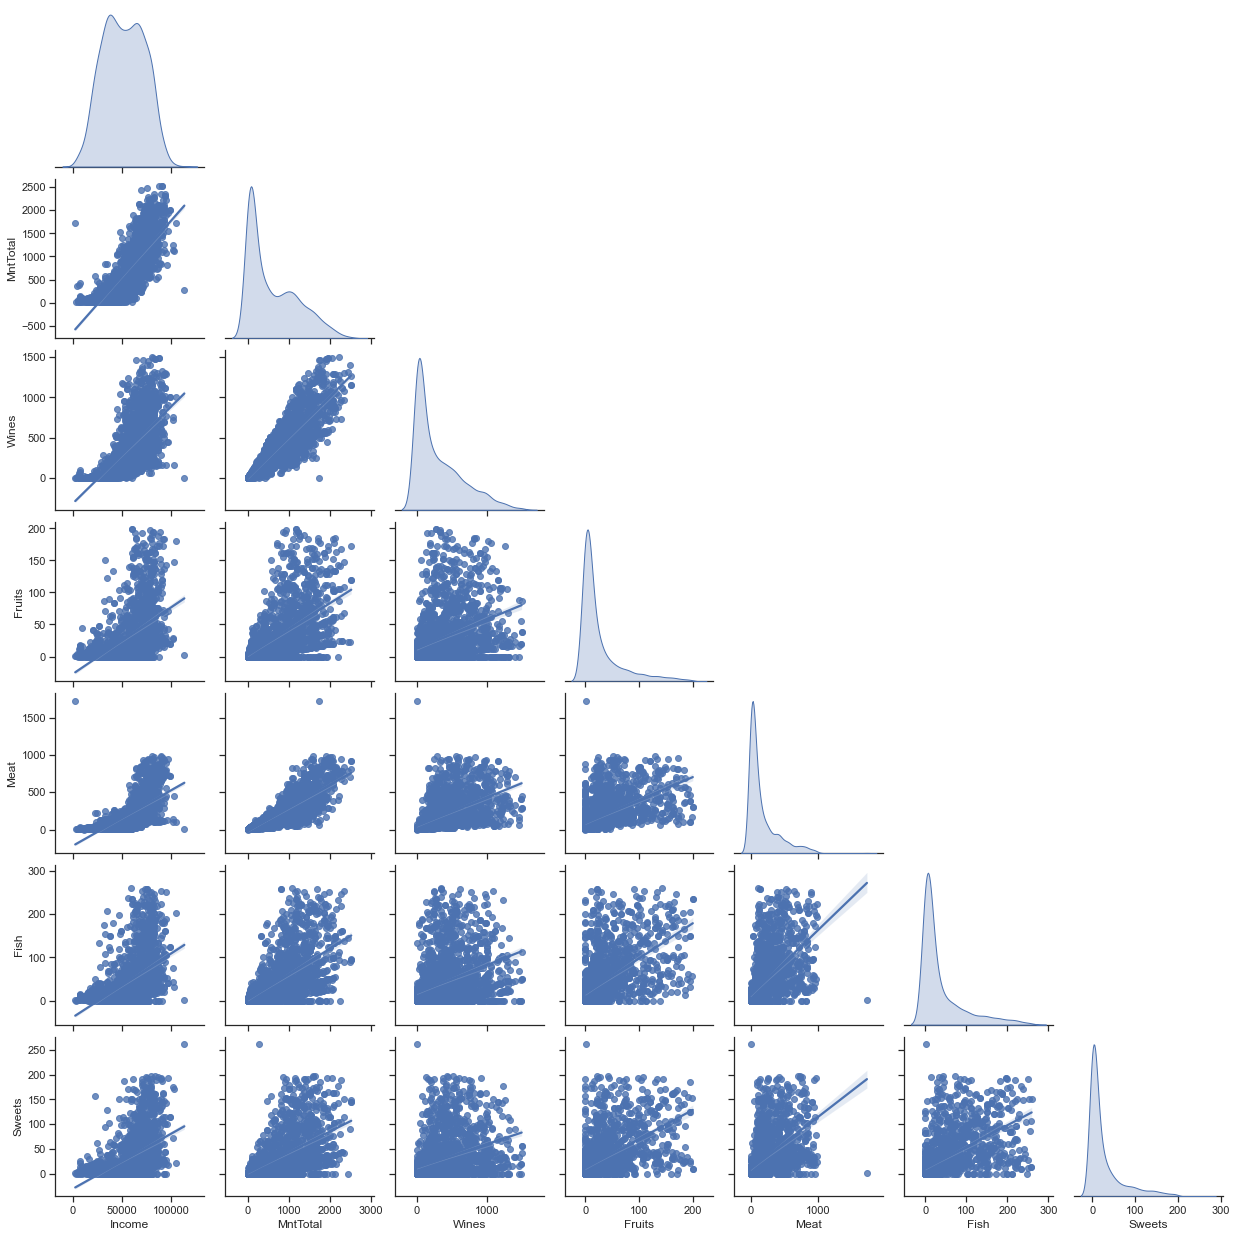

In [68]:
sns.pairplot(df_mkt[['Income', 'MntTotal', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets']],
             kind="reg", diag_kind="kde", corner=True);

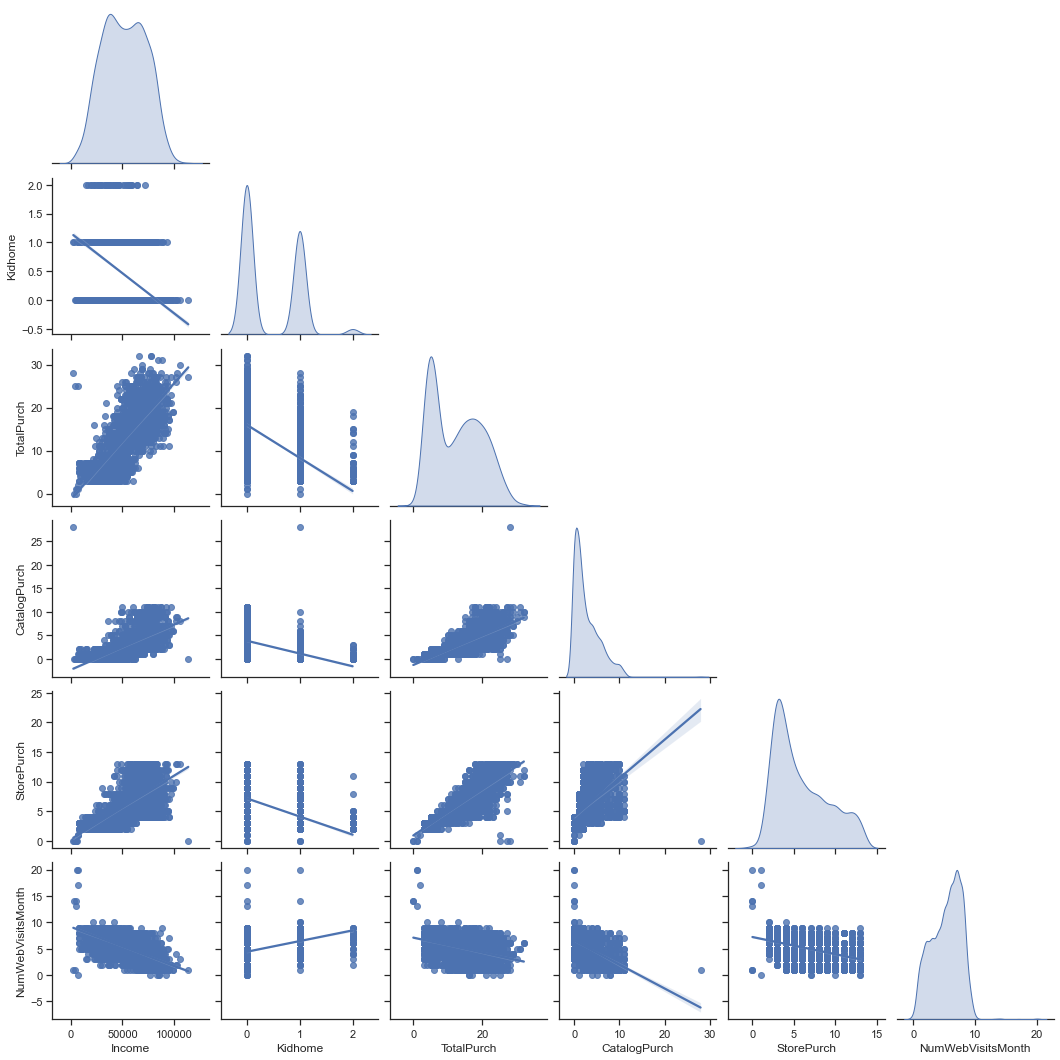

In [69]:
sns.pairplot(df_mkt[['Income', 'Kidhome', 'TotalPurch','CatalogPurch', 'StorePurch', 'NumWebVisitsMonth']],
             kind="reg", diag_kind="kde", corner=True);

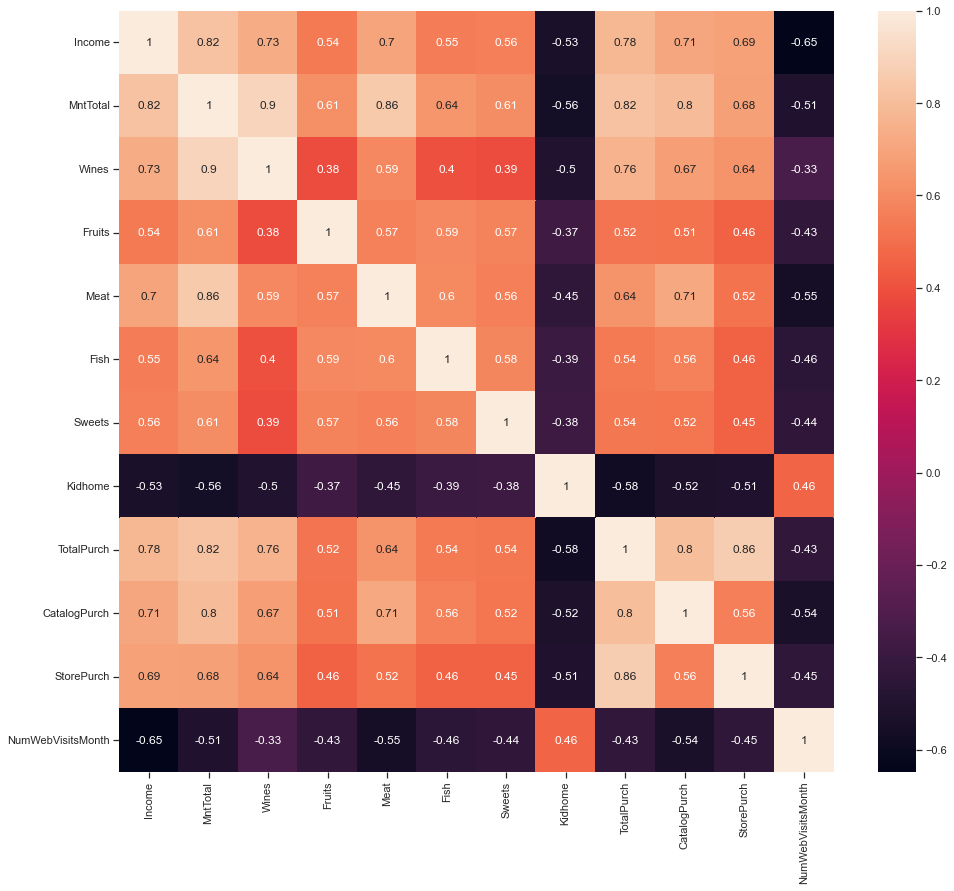

In [70]:
# calculate the correlation matrix
corr = df_mkt[['Income', 'MntTotal', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
              'Kidhome', 'TotalPurch','CatalogPurch', 'StorePurch', 'NumWebVisitsMonth']].corr('pearson')

# plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            annot=True, annot_kws={"size": 12});
#plt.savefig('correlation_matrix.png', bbox_inches='tight');

In [71]:
# Imputation des valeurs nulles de la variable "Income" via une régression linéaire

from sklearn.linear_model import LinearRegression

X_1 = df_mkt[['MntTotal', 'NumWebVisitsMonth', 'TotalPurch', 'Childhome']]#'Wines', 'Meat', 'Sweets','CatalogPurch', 'StorePurch'
y_1 = df_mkt['Income']

X_train = X_1[-y_1.isna()]
y_train = y_1[-y_1.isna()]

# Test set: l’ensemble pour lequel nous voulons prévoir les valeurs manquantes
X_test = X_1[y_1.isna()]

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
model = LinearRegression()
reg = model.fit(X_train_scaled, y_train)
reg.score(X_train_scaled, y_train)

0.7948048580031845

In [72]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

In [73]:
X_train_bis = add_constant(X_train_scaled)
X_test_bis = add_constant(X_test)

model_sm = sm.OLS(y_train,X_train_bis)
results_sm = model_sm.fit()

In [74]:
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     2127.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:09:07   Log-Likelihood:                -23259.
No. Observations:                2202   AIC:                         4.653e+04
Df Residuals:                    2197   BIC:                         4.656e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.169e+04    199.560    259.000      0.0

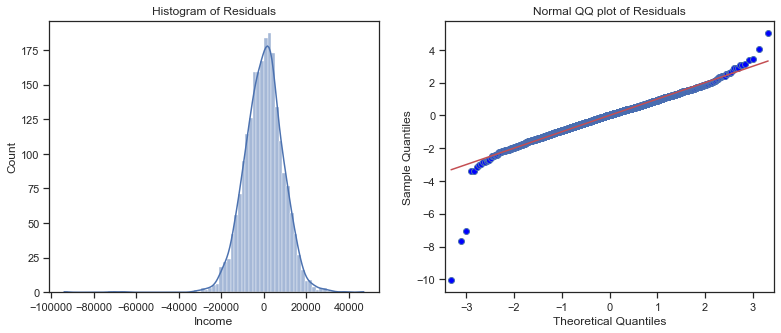

In [75]:
# Vérifier si les résidus correspondent à l’hypothèse gaussienne
fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.histplot(y_train-reg.predict(X_train_scaled), kde=True, ax=ax[0]);
ax[0].set_title('Histogram of Residuals')
sm.graphics.qqplot(y_train-reg.predict(X_train_scaled), line='s', fit=True, ax=ax[1])
ax[1].set_title('Normal QQ plot of Residuals');

#### Imputer les valeurs manquantes

X_test_scaled = scaler.fit_transform(X_test.values)
y_test = model.predict(X_test_scaled)

df_mkt.loc[df_mkt['Income'].isnull(), 'Income'] = y_test